In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
print("Размерность данных:", df.shape)
print("\nИнформация о данных:")
print(df.info())
print("\nОсновные статистики:")
display(df.describe(include='all'))

Размерность данных: (891, 12)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Основные статистики:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Описание столбцов

PassengerId - уникальный идентификатор пассажира

Survived - целевая переменная: 0 = погиб, 1 = выжил

Pclass - класс билета: 1 = первый, 2 = второй, 3 = третий

Name - имя пассажира

Sex - пол: male/female

Age - возраст в годах (дробные значения для детей <1 года)

SibSp - количество siblings (братьев/сестер) + spouses (супругов) на борту

Parch - количество parents (родителей) + children (детей) на борту

Ticket - номер билета

Fare - стоимость билета

Cabin - номер каюты

Embarked - порт посадки: C = Cherbourg, Q = Queenstown, S = Southampton

In [16]:
# Анализ пропущенных значений
print("Пропущенные значения по столбцам:")
missing_data = df.isnull().sum()
percent_missing = (df.isnull().sum() / len(df)) * 100
missing_info = pd.DataFrame({
    'Количество пропусков': missing_data,
    'Процент пропусков': percent_missing.round(2)
})
display(missing_info[missing_info['Количество пропусков'] > 0])

Пропущенные значения по столбцам:


,Количество пропусков,Процент пропусков
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


In [19]:
# Сохраняем копию данных до заполнения
df_original = df.copy()

# 1. Age (Возраст) - заполняем медианой по полу и классу
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

# 2. Embarked (Порт посадки) - заполняем модой (самым частым значением)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 3. Fare (Стоимость билета) - заполняем медианой по классу
df['Fare'] = df.groupby('Pclass')['Fare'].transform(
    lambda x: x.fillna(x.median())
)

/tmp/ipython-input-3627725049.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# Гипотеза: пассажиры с определенного порта имели шанс выживания выше, нежели с других портов

,Количество,Процент
Embarked,,
S,646,72.50
C,168,18.86
Q,77,8.64


/tmp/ipython-input-764674570.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', ax=ax1, palette='viridis')


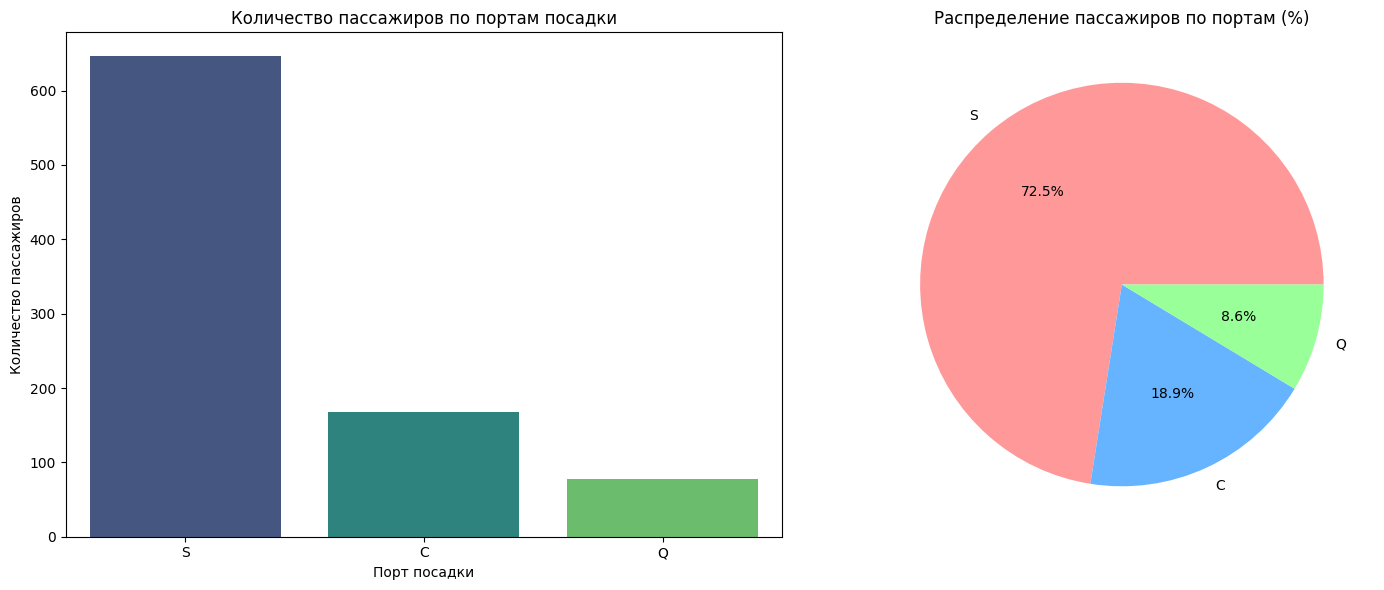

In [24]:
# Количество пассажиров по портам
#РАСПРЕДЕЛЕНИЕ ПАССАЖИРОВ ПО ПОРТАМ ПОСАДКИ:
port_counts = df['Embarked'].value_counts()
port_percent = df['Embarked'].value_counts(normalize=True) * 100

port_dist = pd.DataFrame({
    'Количество': port_counts,
    'Процент': port_percent.round(2)
})
display(port_dist)

# Визуализация распределения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Столбчатая диаграмма
sns.countplot(data=df, x='Embarked', ax=ax1, palette='viridis')
ax1.set_title('Количество пассажиров по портам посадки')
ax1.set_xlabel('Порт посадки')
ax1.set_ylabel('Количество пассажиров')

# Круговая диаграмма
port_counts.plot.pie(ax=ax2, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
ax2.set_title('Распределение пассажиров по портам (%)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

Вывод: Большинство пассажиров (~72%) сели в Саутгемптоне (S), тогда как Шербур (C) и Квинстаун (Q) имели примерно равное меньшее количество пассажиров.

,total_passengers,survived,survival_rate,survival_percent
Embarked,,,,
C,168,93,0.554,55.4
Q,77,30,0.390,39.0
S,646,219,0.339,33.9


/tmp/ipython-input-1379592062.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Survived', ax=ax2,
/tmp/ipython-input-1379592062.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Survived', ax=ax2,


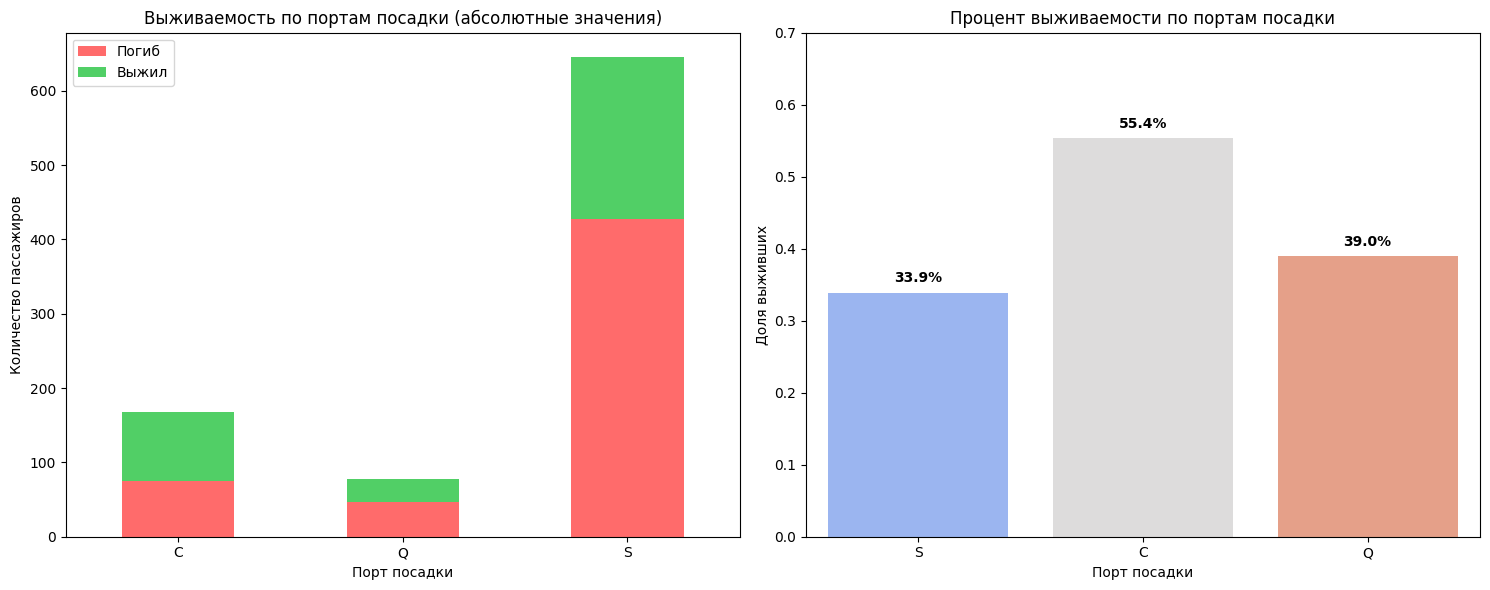

In [25]:
# Анализ выживаемости по портам посадки
# Создаем таблицу выживаемости
survival_by_port = df.groupby('Embarked')['Survived'].agg([
    ('total_passengers', 'count'),
    ('survived', 'sum'),
    ('survival_rate', 'mean')
]).round(3)

survival_by_port['survival_percent'] = (survival_by_port['survival_rate'] * 100).round(1)
display(survival_by_port)

# Визуализация выживаемости
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Stacked bar plot - абсолютные значения
port_survival_counts = pd.crosstab(df['Embarked'], df['Survived'])
port_survival_counts.plot(kind='bar', stacked=True, ax=ax1,
                       color=['#ff6b6b', '#51cf66'])
ax1.set_title('Выживаемость по портам посадки (абсолютные значения)')
ax1.set_xlabel('Порт посадки')
ax1.set_ylabel('Количество пассажиров')
ax1.legend(['Погиб', 'Выжил'])
ax1.tick_params(axis='x', rotation=0)

# 2. Bar plot - процент выживаемости
sns.barplot(data=df, x='Embarked', y='Survived', ax=ax2,
            estimator=np.mean, palette='coolwarm', ci=None)
ax2.set_title('Процент выживаемости по портам посадки')
ax2.set_xlabel('Порт посадки')
ax2.set_ylabel('Доля выживших')
ax2.set_ylim(0, 0.7)

# Добавляем аннотации с процентами
for i, p in enumerate(ax2.patches):
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [27]:
# Статистическая проверка значимости различий
from scipy.stats import chi2_contingency

print("СТАТИСТИЧЕСКАЯ ПРОВЕРКА ЗНАЧИМОСТИ:")

# Создаем таблицу сопряженности
contingency_table = pd.crosstab(df['Embarked'], df['Survived'])
print("Таблица сопряженности:")
display(contingency_table)

# Тест хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nРезультаты теста хи-квадрат:")
print(f"Хи-квадрат: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Степени свободы: {dof}")



СТАТИСТИЧЕСКАЯ ПРОВЕРКА ЗНАЧИМОСТИ:
Таблица сопряженности:


Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,219



Результаты теста хи-квадрат:
Хи-квадрат: 25.9645
p-value: 0.0000
Степени свободы: 2


Вывод: Пассажиры из Шербура (C) имели значительно более высокий шанс выживания по сравнению
с пассажирами из других портов.

Гипотеза: Пассажиры, путешествовавшие в первом классе, приобретали билеты дороже, и их шансы на выживание были выше, чем у тех, чья стоимость билета была ниже.

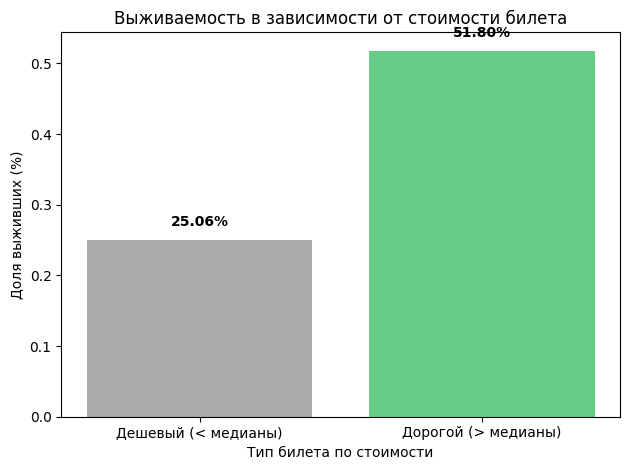

In [ ]:
# Находим медиану стоимости билета
fare_median = df['Fare'].median()

# Создаем признак: дорогой/дешевый билет
df['Expensive_Ticket'] = df['Fare'] > fare_median

# Группируем и считаем отношение выживших
survival_by_fare = df.groupby('Expensive_Ticket')['Survived'].mean()

# Визуализация
plt.bar(['Дешевый (< медианы)', 'Дорогой (> медианы)'], survival_by_fare.values, color=['#aaaaaa', '#66cc88'])
plt.xlabel('Тип билета по стоимости')
plt.ylabel('Доля выживших (%)')
plt.title('Выживаемость в зависимости от стоимости билета')
for i, v in enumerate(survival_by_fare.values):
    plt.text(i, v+0.02, f'{v:.2%}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


Вывод: Поссажири с более дорогим билетом имели значительно больше шанс, по сравнению с поссажирами с более дешевым билетом

##Гипотеза - Влияние пола на выживаемость

,Количество,Процент
Sex,,
male,577,64.76
female,314,35.24


/tmp/ipython-input-2474870858.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', ax=ax1, palette=['#66b3ff', '#ff9999'])


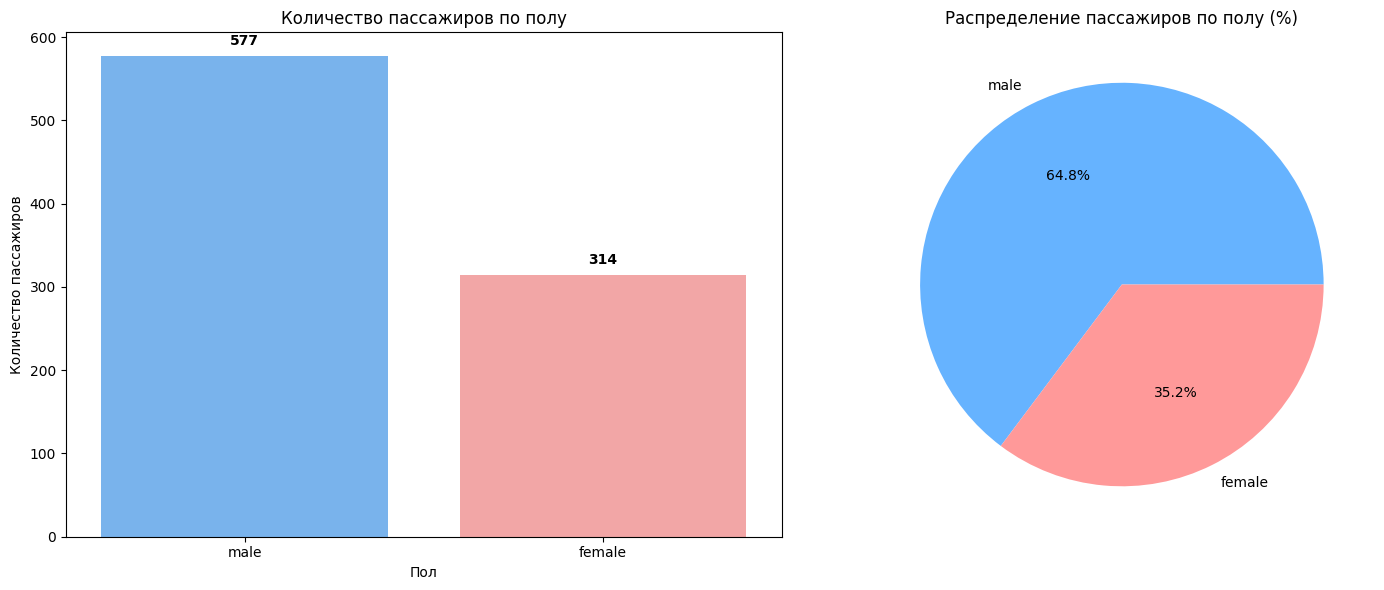

In [29]:
# Анализ распределения пассажиров по полу

# Количество пассажиров по полу
sex_counts = df['Sex'].value_counts()
sex_percent = df['Sex'].value_counts(normalize=True) * 100

sex_dist = pd.DataFrame({
    'Количество': sex_counts,
    'Процент': sex_percent.round(2)
})
display(sex_dist)

# Визуализация распределения
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Столбчатая диаграмма
sns.countplot(data=df, x='Sex', ax=ax1, palette=['#66b3ff', '#ff9999'])
ax1.set_title('Количество пассажиров по полу')
ax1.set_xlabel('Пол')
ax1.set_ylabel('Количество пассажиров')

# Добавляем аннотации с количеством
for i, p in enumerate(ax1.patches):
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width()/2., height + 10,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Круговая диаграмма
sex_counts.plot.pie(ax=ax2, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
ax2.set_title('Распределение пассажиров по полу (%)')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


На борту было примерно в 1.5 раза больше мужчин (64.8%), чем женщин (35.2%).

АНАЛИЗ ВЫЖИВАЕМОСТИ ПО ПОЛУ:


,total_passengers,survived,survival_rate,survival_percent
Sex,,,,
female,314,233,0.742,74.2
male,577,109,0.189,18.9


/tmp/ipython-input-3827860902.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', ax=ax2,
/tmp/ipython-input-3827860902.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', ax=ax2,


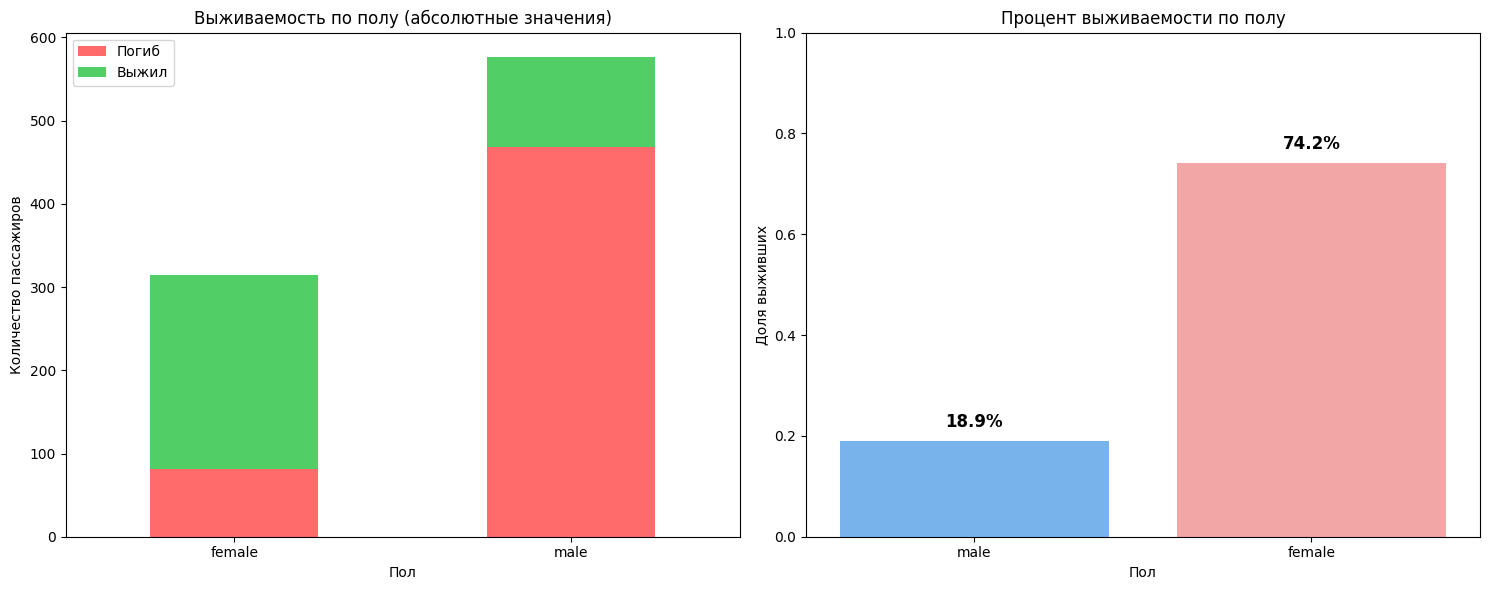

In [30]:
# Анализ выживаемости по полу
print("АНАЛИЗ ВЫЖИВАЕМОСТИ ПО ПОЛУ:")

# Создаем таблицу выживаемости
survival_by_sex = df.groupby('Sex')['Survived'].agg([
    ('total_passengers', 'count'),
    ('survived', 'sum'),
    ('survival_rate', 'mean')
]).round(3)

survival_by_sex['survival_percent'] = (survival_by_sex['survival_rate'] * 100).round(1)
display(survival_by_sex)

# Визуализация выживаемости
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Stacked bar plot - абсолютные значения
sex_survival_counts = pd.crosstab(df['Sex'], df['Survived'])
sex_survival_counts.plot(kind='bar', stacked=True, ax=ax1,
                       color=['#ff6b6b', '#51cf66'])
ax1.set_title('Выживаемость по полу (абсолютные значения)')
ax1.set_xlabel('Пол')
ax1.set_ylabel('Количество пассажиров')
ax1.legend(['Погиб', 'Выжил'])
ax1.tick_params(axis='x', rotation=0)

# 2. Bar plot - процент выживаемости
sns.barplot(data=df, x='Sex', y='Survived', ax=ax2,
            estimator=np.mean, palette=['#66b3ff', '#ff9999'], ci=None)
ax2.set_title('Процент выживаемости по полу')
ax2.set_xlabel('Пол')
ax2.set_ylabel('Доля выживших')
ax2.set_ylim(0, 1.0)

# Добавляем аннотации с процентами
for i, p in enumerate(ax2.patches):
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.02,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

Вывод: Выживаемость действительно сильно зависит от пола. Женщины имели более высокие шансы на выживание по сравнению с мужчинами.

## Гипотеза - Влияние возраста на выживаемость

Основные статистики возраста:


,count,mean,std,min,25%,50%,75%,max
Age,891.0,29.112424,13.304424,0.42,21.5,26.0,36.0,80.0


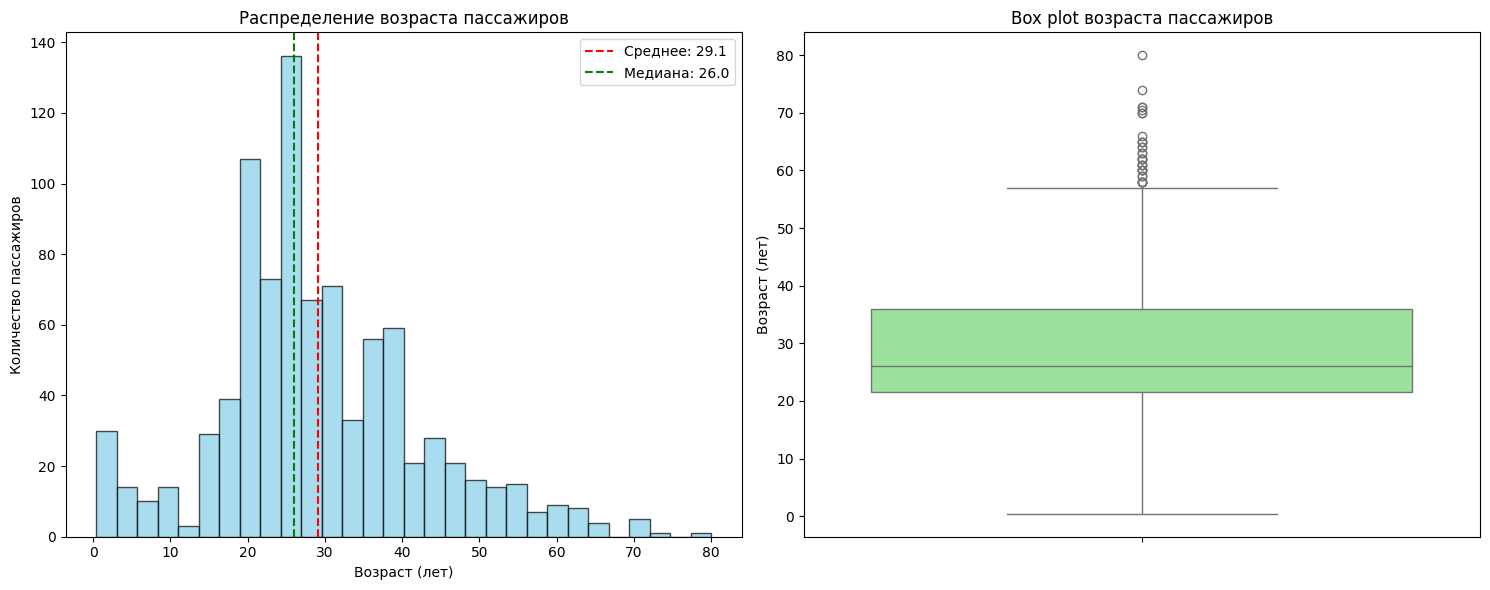

In [31]:
# Анализ распределения возраста

# Основные статистики по возрасту
age_stats = df['Age'].describe()
print("Основные статистики возраста:")
display(pd.DataFrame(age_stats).T)

# Визуализация распределения возраста
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Гистограмма распределения возраста
ax1.hist(df['Age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Распределение возраста пассажиров')
ax1.set_xlabel('Возраст (лет)')
ax1.set_ylabel('Количество пассажиров')
ax1.axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Среднее: {df["Age"].mean():.1f}')
ax1.axvline(df['Age'].median(), color='green', linestyle='--', label=f'Медиана: {df["Age"].median():.1f}')
ax1.legend()

# Box plot возраста
sns.boxplot(y=df['Age'], ax=ax2, color='lightgreen')
ax2.set_title('Box plot возраста пассажиров')
ax2.set_ylabel('Возраст (лет)')

plt.tight_layout()
plt.show()

/tmp/ipython-input-877585118.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Survived', y='Age', ax=ax2, palette=['red', 'green'])
/tmp/ipython-input-877585118.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Погиб', 'Выжил'])


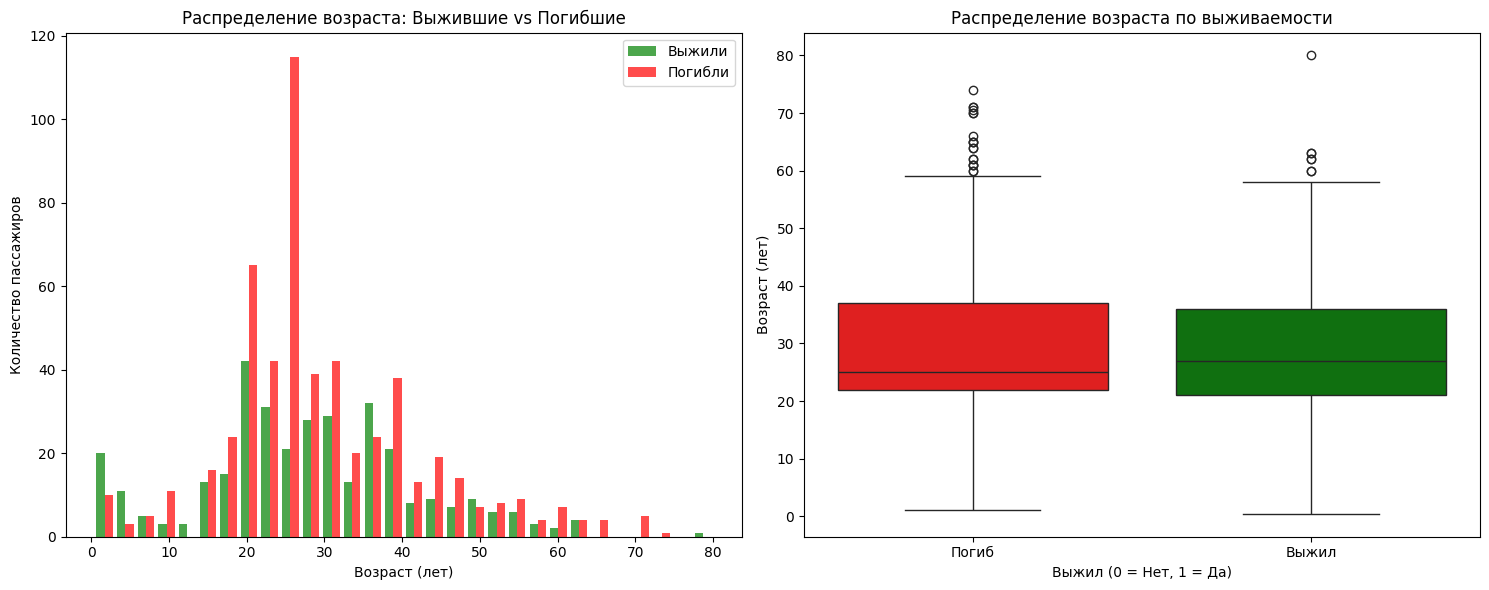

Сравнение возраста выживших и погибших:


,mean,median,std,count
Survived,,,,
0,29.74,25.0,12.82,549
1,28.11,27.0,14.01,342


In [32]:
# Визуализация выживаемости по возрасту

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Гистограмма выживших vs погибших по возрасту
survived_age = df[df['Survived'] == 1]['Age']
not_survived_age = df[df['Survived'] == 0]['Age']

ax1.hist([survived_age, not_survived_age], bins=30, alpha=0.7,
         label=['Выжили', 'Погибли'], color=['green', 'red'])
ax1.set_title('Распределение возраста: Выжившие vs Погибшие')
ax1.set_xlabel('Возраст (лет)')
ax1.set_ylabel('Количество пассажиров')
ax1.legend()

# 2. Box plot выживаемости по возрасту
sns.boxplot(data=df, x='Survived', y='Age', ax=ax2, palette=['red', 'green'])
ax2.set_title('Распределение возраста по выживаемости')
ax2.set_xlabel('Выжил (0 = Нет, 1 = Да)')
ax2.set_ylabel('Возраст (лет)')
ax2.set_xticklabels(['Погиб', 'Выжил'])

plt.tight_layout()
plt.show()

# Статистики по возрасту для выживших и погибших
age_comparison = df.groupby('Survived')['Age'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Сравнение возраста выживших и погибших:")
display(age_comparison)

/tmp/ipython-input-2288369641.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].agg([


,total_passengers,survived,survival_rate,survival_percent
AgeGroup,,,,
Дети (0-12),69,40,0.580,58.0
Подростки (13-18),70,30,0.429,42.9
Молодые (19-35),514,184,0.358,35.8
Взрослые (36-60),216,83,0.384,38.4
Пожилые (60+),22,5,0.227,22.7


/tmp/ipython-input-2288369641.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', ax=ax2,
/tmp/ipython-input-2288369641.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', ax=ax2,


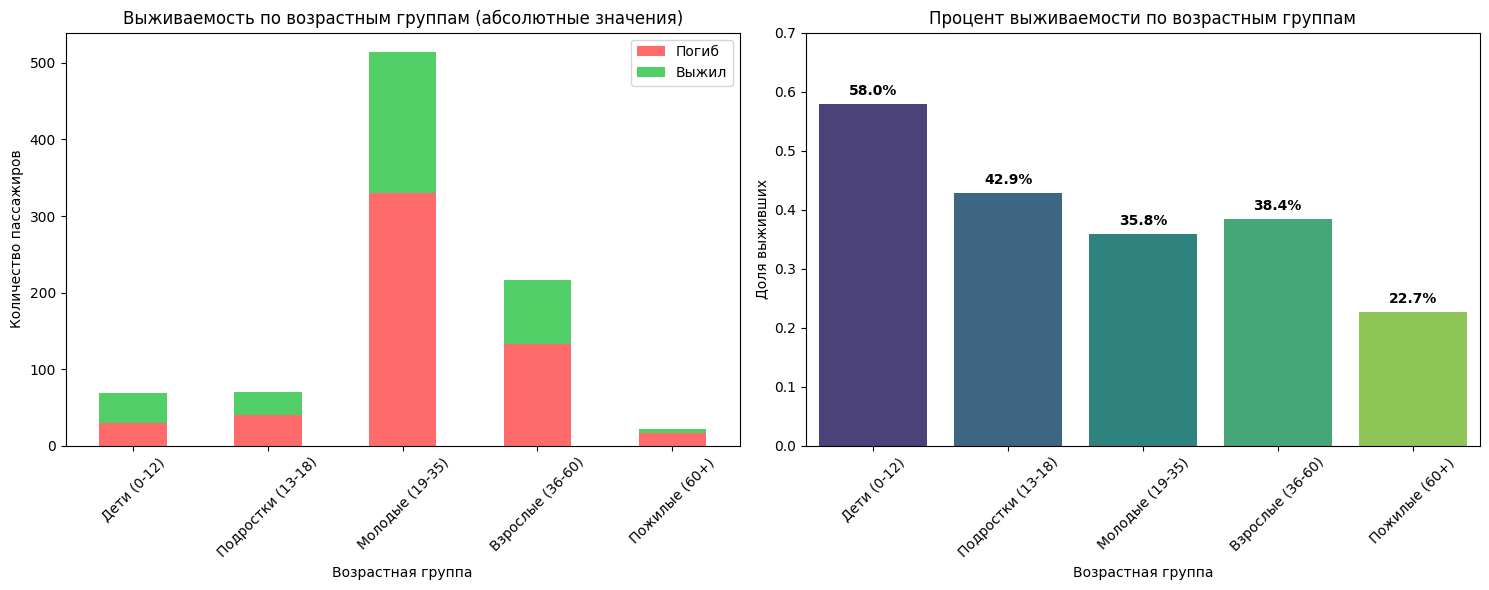

In [34]:
# Создание возрастных групп для более детального анализа

# Создаем возрастные группы
df['AgeGroup'] = pd.cut(df['Age'],
                       bins=[0, 12, 18, 35, 60, 100],
                       labels=['Дети (0-12)', 'Подростки (13-18)',
                              'Молодые (19-35)', 'Взрослые (36-60)',
                              'Пожилые (60+)'])

# Анализ выживаемости по возрастным группам
age_group_survival = df.groupby('AgeGroup')['Survived'].agg([
    ('total_passengers', 'count'),
    ('survived', 'sum'),
    ('survival_rate', 'mean')
]).round(3)

age_group_survival['survival_percent'] = (age_group_survival['survival_rate'] * 100).round(1)
display(age_group_survival)

# Визуализация выживаемости по возрастным группам
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 1. Stacked bar plot
age_group_counts = pd.crosstab(df['AgeGroup'], df['Survived'])
age_group_counts.plot(kind='bar', stacked=True, ax=ax1, color=['#ff6b6b', '#51cf66'])
ax1.set_title('Выживаемость по возрастным группам (абсолютные значения)')
ax1.set_xlabel('Возрастная группа')
ax1.set_ylabel('Количество пассажиров')
ax1.legend(['Погиб', 'Выжил'])
ax1.tick_params(axis='x', rotation=45)

# 2. Bar plot - процент выживаемости
sns.barplot(data=df, x='AgeGroup', y='Survived', ax=ax2,
            estimator=np.mean, palette='viridis', ci=None)
ax2.set_title('Процент выживаемости по возрастным группам')
ax2.set_xlabel('Возрастная группа')
ax2.set_ylabel('Доля выживших')
ax2.set_ylim(0, 0.7)
ax2.tick_params(axis='x', rotation=45)

# Добавляем аннотации с процентами
for i, p in enumerate(ax2.patches):
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Вывод: Выживаемость действительно зависит от возраста, но не линейно.
Дети имели приоритет, тогда как пожилые люди сталкивались с повышенным риском.

## Создание новых, более информативных признаков на основе исходных данных, чтобы улучшить качество модели.

1. FamilySize - размер семьи
2. IsAlone - одинокий пассажир
3. Deck - палуба, извлеченная из номера каюты
4. AgeGroup - категоризация возраста
5. FarePerPerson - цена билета на человека

Статистики FamilySize:


,FamilySize
count,891.000000
mean,1.904602
std,1.613459
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11.000000



Распределение IsAlone:


,count
IsAlone,
1,537
0,354


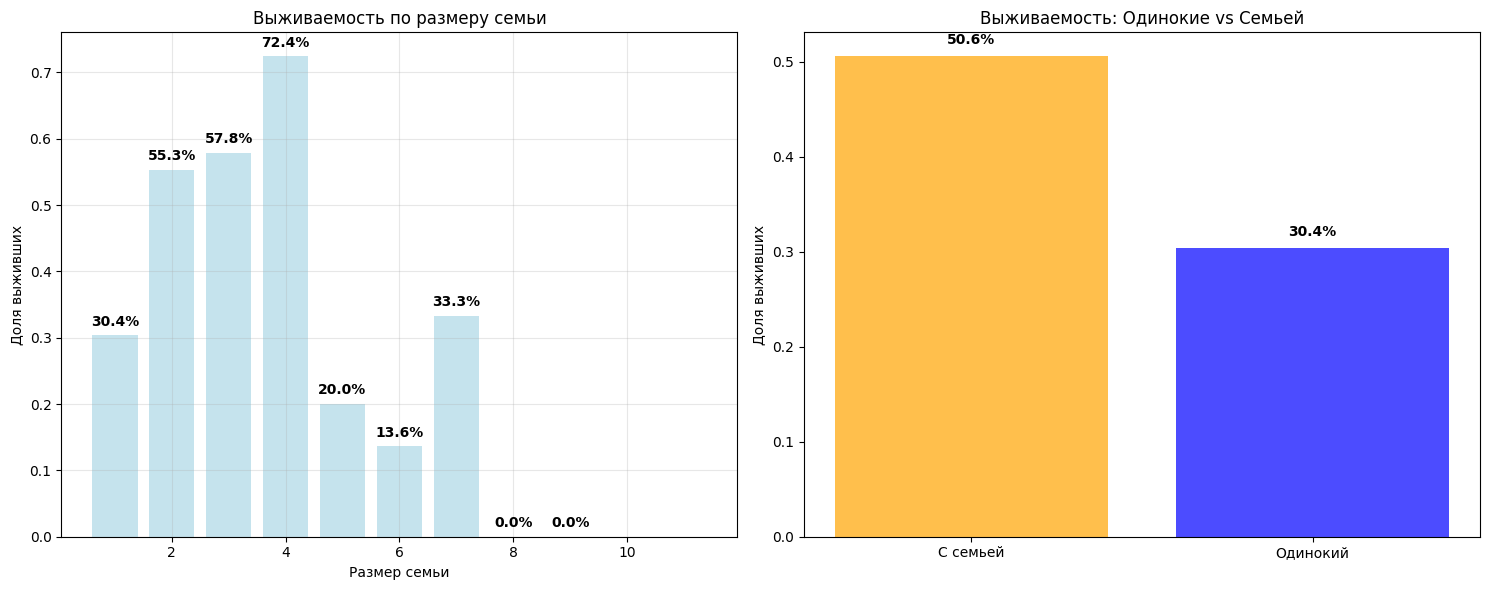

In [35]:
# Создание семейных признаков

# Размер семьи
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
print("Статистики FamilySize:")
display(df['FamilySize'].describe())

# Одинокий пассажир
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
print("\nРаспределение IsAlone:")
display(df['IsAlone'].value_counts())

# Визуализация выживаемости по семейным признакам
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Выживаемость по размеру семьи
family_size_survival = df.groupby('FamilySize')['Survived'].mean()
ax1.bar(family_size_survival.index, family_size_survival.values, color='lightblue', alpha=0.7)
ax1.set_title('Выживаемость по размеру семьи')
ax1.set_xlabel('Размер семьи')
ax1.set_ylabel('Доля выживших')
ax1.grid(True, alpha=0.3)

# Добавляем аннотации
for i, v in enumerate(family_size_survival.values):
    ax1.text(i+1, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')

# Выживаемость для одиноких vs с семьей
alone_survival = df.groupby('IsAlone')['Survived'].mean()
ax2.bar(['С семьей', 'Одинокий'], alone_survival.values, color=['orange', 'blue'], alpha=0.7)
ax2.set_title('Выживаемость: Одинокие vs Семьей')
ax2.set_ylabel('Доля выживших')

# Добавляем аннотации
for i, v in enumerate(alone_survival.values):
    ax2.text(i, v + 0.01, f'{v:.1%}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Распределение по палубам:


,count
Deck,
C,59
B,47
D,33
E,32
A,15
F,13
G,4
T,1



Выживаемость по палубам:


/tmp/ipython-input-915340365.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Deck'].fillna('Unknown', inplace=True)


,total_passengers,survived,survival_rate,survival_percent
Deck,,,,
A,15,7,0.467,46.7
B,47,35,0.745,74.5
C,59,35,0.593,59.3
D,33,25,0.758,75.8
E,32,24,0.750,75.0
F,13,8,0.615,61.5
G,4,2,0.500,50.0
T,1,0,0.000,0.0
Unknown,687,206,0.300,30.0


/tmp/ipython-input-915340365.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Deck', y='Survived', estimator=np.mean, palette='Set2', ci=None, order=deck_survival.index)
/tmp/ipython-input-915340365.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Deck', y='Survived', estimator=np.mean, palette='Set2', ci=None, order=deck_survival.index)


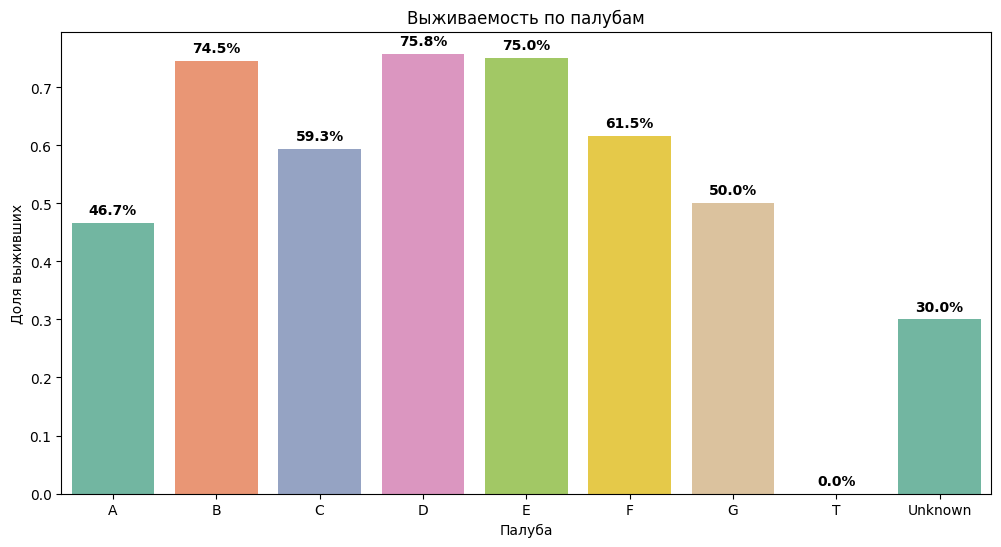

In [36]:
# Создание признака Deck из Cabin

# Извлекаем первую букву из Cabin (обозначает палубу)
df['Deck'] = df['Cabin'].str[0]

# Анализ распределения палуб
deck_counts = df['Deck'].value_counts()
print("Распределение по палубам:")
display(deck_counts)

# Заменяем NaN на 'Unknown'
df['Deck'].fillna('Unknown', inplace=True)

# Анализ выживаемости по палубам
deck_survival = df.groupby('Deck')['Survived'].agg([
    ('total_passengers', 'count'),
    ('survived', 'sum'),
    ('survival_rate', 'mean')
]).round(3)

deck_survival['survival_percent'] = (deck_survival['survival_rate'] * 100).round(1)
print("\nВыживаемость по палубам:")
display(deck_survival)

# Визуализация выживаемости по палубам
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Deck', y='Survived', estimator=np.mean, palette='Set2', ci=None, order=deck_survival.index)
plt.title('Выживаемость по палубам')
plt.xlabel('Палуба')
plt.ylabel('Доля выживших')

# Добавляем аннотации
ax = plt.gca()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.show()

Распределение по возрастным группам:


,Количество,Процент
AgeGroup,,
Adult,769,86.31
Child,100,11.22
Senior,22,2.47



Выживаемость по возрастным группам:


/tmp/ipython-input-2820206169.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_survival = df.groupby('AgeGroup')['Survived'].agg([


,total_passengers,survived,survival_rate,survival_percent
AgeGroup,,,,
Child,100,55,0.550,55.0
Adult,769,282,0.367,36.7
Senior,22,5,0.227,22.7


/tmp/ipython-input-2820206169.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', estimator=np.mean, palette='pastel', ci=None)
/tmp/ipython-input-2820206169.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AgeGroup', y='Survived', estimator=np.mean, palette='pastel', ci=None)


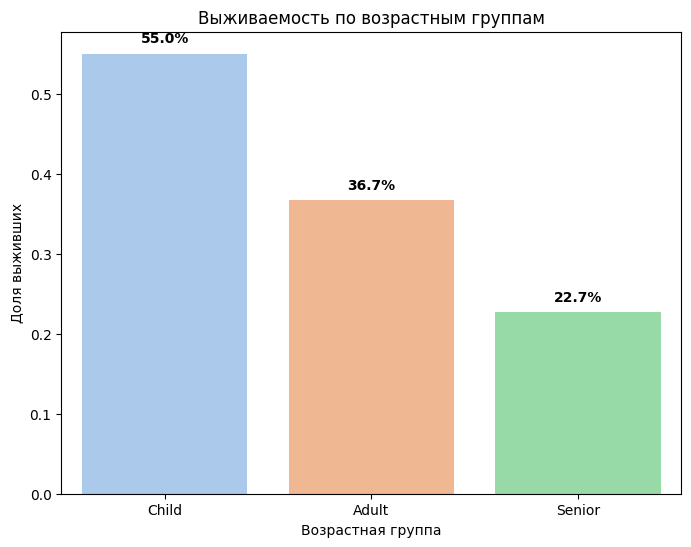

In [37]:
# Создание AgeGroup (возрастные группы)

# Создаем возрастные группы: ребенок, взрослый, пожилой
df['AgeGroup'] = pd.cut(df['Age'],
                       bins=[0, 16, 60, 100],
                       labels=['Child', 'Adult', 'Senior'])

# Анализ распределения по возрастным группам
agegroup_counts = df['AgeGroup'].value_counts()
agegroup_percent = df['AgeGroup'].value_counts(normalize=True) * 100

agegroup_dist = pd.DataFrame({
    'Количество': agegroup_counts,
    'Процент': agegroup_percent.round(2)
})
print("Распределение по возрастным группам:")
display(agegroup_dist)

# Анализ выживаемости по возрастным группам
agegroup_survival = df.groupby('AgeGroup')['Survived'].agg([
    ('total_passengers', 'count'),
    ('survived', 'sum'),
    ('survival_rate', 'mean')
]).round(3)

agegroup_survival['survival_percent'] = (agegroup_survival['survival_rate'] * 100).round(1)
print("\nВыживаемость по возрастным группам:")
display(agegroup_survival)

# Визуализация выживаемости по возрастным группам
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='AgeGroup', y='Survived', estimator=np.mean, palette='pastel', ci=None)
plt.title('Выживаемость по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Доля выживших')

# Добавляем аннотации
ax = plt.gca()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.show()

Статистики FarePerPerson:


,FarePerPerson
count,891.000000
mean,19.916375
std,35.841257
min,0.000000
25%,7.250000
50%,8.300000
75%,23.666667
max,512.329200


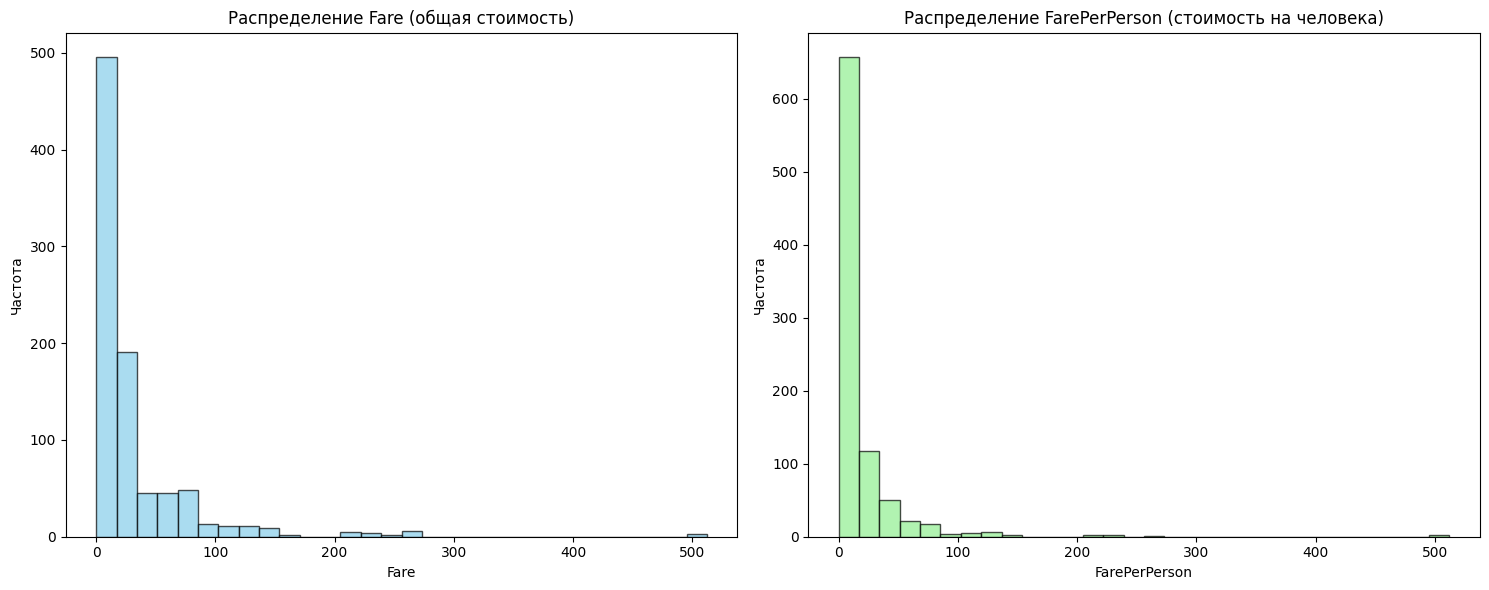

Выживаемость по квартилям FarePerPerson:


/tmp/ipython-input-461401033.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  faregroup_survival = df.groupby('FarePerPersonGroup')['Survived'].mean()


,Survived
FarePerPersonGroup,
Q1,0.265487
Q2,0.254545
Q3,0.408072
Q4,0.608108


/tmp/ipython-input-461401033.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faregroup_survival.index, y=faregroup_survival.values, palette='coolwarm')


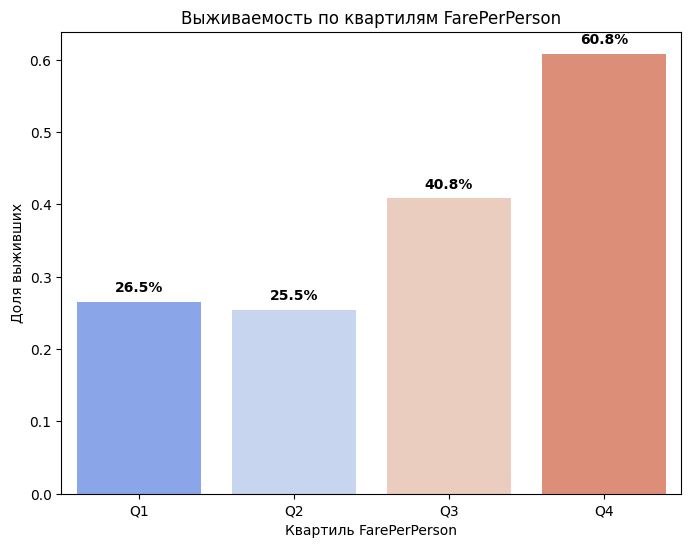

In [38]:
# Создание FarePerPerson
# Цена билета на человека
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

print("Статистики FarePerPerson:")
display(df['FarePerPerson'].describe())

# Сравнение Fare и FarePerPerson
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Распределение Fare
ax1.hist(df['Fare'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Распределение Fare (общая стоимость)')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Частота')

# Распределение FarePerPerson
ax2.hist(df['FarePerPerson'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.set_title('Распределение FarePerPerson (стоимость на человека)')
ax2.set_xlabel('FarePerPerson')
ax2.set_ylabel('Частота')

plt.tight_layout()
plt.show()

# Анализ выживаемости по FarePerPerson (квартили)
df['FarePerPersonGroup'] = pd.qcut(df['FarePerPerson'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
faregroup_survival = df.groupby('FarePerPersonGroup')['Survived'].mean()

print("Выживаемость по квартилям FarePerPerson:")
display(faregroup_survival)

plt.figure(figsize=(8, 6))
sns.barplot(x=faregroup_survival.index, y=faregroup_survival.values, palette='coolwarm')
plt.title('Выживаемость по квартилям FarePerPerson')
plt.xlabel('Квартиль FarePerPerson')
plt.ylabel('Доля выживших')

# Добавляем аннотации
ax = plt.gca()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01,
            f'{height:.1%}', ha='center', va='bottom', fontweight='bold')

plt.show()

Корреляции новых признаков с Survived:


,Survived
Survived,1.000000
FarePerPerson,0.221600
AgeGroup_encoded,0.052209
FamilySize,0.016639
IsAlone,-0.203367
Deck_encoded,-0.301116


/tmp/ipython-input-3656638762.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')


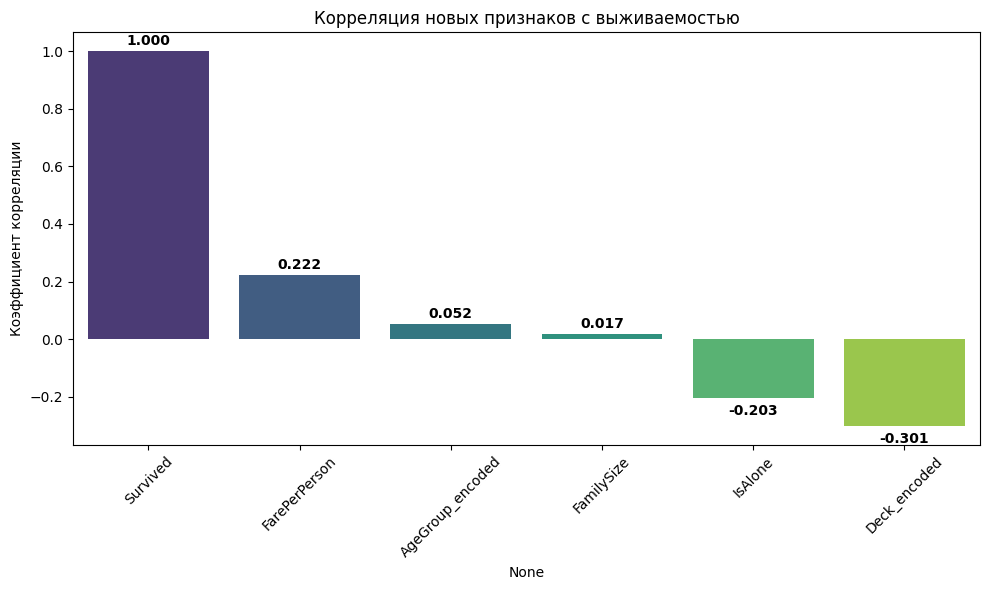

In [39]:
# Анализ корреляции новых признаков с целевой переменной

# Подготовка данных для корреляционного анализа
df_encoded = df.copy()

# Кодируем категориальные признаки для корреляции
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['Deck_encoded'] = le.fit_transform(df_encoded['Deck'])
df_encoded['AgeGroup_encoded'] = le.fit_transform(df_encoded['AgeGroup'])

# Выбираем только новые признаки + таргет
new_features = ['FamilySize', 'IsAlone', 'Deck_encoded', 'AgeGroup_encoded', 'FarePerPerson']
correlation_data = df_encoded[new_features + ['Survived']]

# Вычисляем корреляции
correlations = correlation_data.corr()['Survived'].sort_values(ascending=False)

print("Корреляции новых признаков с Survived:")
display(correlations)

# Визуализация корреляций
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.title('Корреляция новых признаков с выживаемостью')
plt.xticks(rotation=45)
plt.ylabel('Коэффициент корреляции')

# Добавляем аннотации
ax = plt.gca()
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.01 if height > 0 else height - 0.02,
            f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')

plt.tight_layout()
plt.show()

Важность всех признаков по Random Forest:


,feature,importance
1,Sex,0.247282
2,Age,0.195500
5,Fare,0.154563
11,FarePerPerson,0.149582
9,Deck_encoded,0.070587
0,Pclass,0.047080
7,FamilySize,0.035399
6,Embarked,0.030368
4,Parch,0.021569
3,SibSp,0.020102



Важность НОВЫХ признаков:


,feature,importance
11,FarePerPerson,0.149582
9,Deck_encoded,0.070587
7,FamilySize,0.035399
10,AgeGroup_encoded,0.016566
8,IsAlone,0.011401


/tmp/ipython-input-765391461.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_features_importance, x='importance', y='feature', palette='magma')


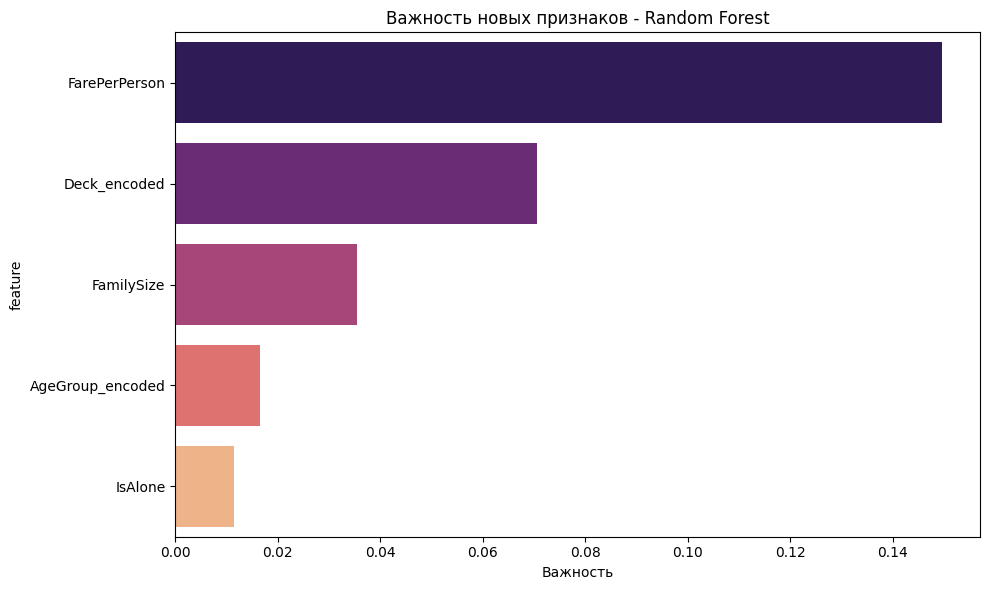

In [41]:
# Анализ важности признаков с помощью Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Подготовка данных для модели
features_for_model = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'] + new_features
X = df_encoded[features_for_model]
y = df_encoded['Survived']

# Кодируем оставшиеся категориальные признаки
X_encoded = X.copy()
X_encoded['Sex'] = le.fit_transform(X_encoded['Sex'])
X_encoded['Embarked'] = le.fit_transform(X_encoded['Embarked'])

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Обучаем Random Forest для анализа важности признаков
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Получаем важности признаков
feature_importances = pd.DataFrame({
    'feature': features_for_model,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Важность всех признаков по Random Forest:")
display(feature_importances)

# Фокусируемся на новых признаках
new_features_importance = feature_importances[feature_importances['feature'].isin(new_features)]
print("\nВажность НОВЫХ признаков:")
display(new_features_importance)

# Визуализация важности новых признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=new_features_importance, x='importance', y='feature', palette='magma')
plt.title('Важность новых признаков - Random Forest')
plt.xlabel('Важность')
plt.tight_layout()
plt.show()

Мы обучаем модели на предсказание бинарной целевой переменной:

Survived = 0 - пассажир погиб

Survived = 1 - пассажир выжил

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Базовые признаки + новые engineered признаки
base_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
new_features = ['FamilySize', 'IsAlone', 'Deck', 'AgeGroup', 'FarePerPerson']

# Создаем финальный DataFrame
df_final = df[base_features + new_features + ['Survived']].copy()

print(f"Исходная размерность данных: {df_final.shape}")
print("\nПризнаки в финальном наборе:")
for i, feature in enumerate(base_features + new_features, 1):
    print(f"{i:2d}. {feature}")

# Кодируем категориальные признаки
print("\nКОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:")

label_encoders = {}
categorical_features = ['Sex', 'Embarked', 'Deck', 'AgeGroup']

for feature in categorical_features:
    le = LabelEncoder()
    df_final[feature + '_encoded'] = le.fit_transform(df_final[feature].astype(str))
    label_encoders[feature] = le
    print(f"{feature}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Финальный список числовых признаков для модели
final_numeric_features = [
    'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
    'FamilySize', 'IsAlone', 'FarePerPerson',
    'Sex_encoded', 'Embarked_encoded', 'Deck_encoded', 'AgeGroup_encoded'
]

print(f"\nФинальные признаки для модели ({len(final_numeric_features)}):")
for i, feature in enumerate(final_numeric_features, 1):
    print(f"{i:2d}. {feature}")

# Разделяем на features (X) и target (y)
X = df_final[final_numeric_features]
y = df_final['Survived']

print(f"\nРазмерность перед разделением:")
print(f"X: {X.shape}")
print(f"y: {y.shape}")

Исходная размерность данных: (891, 13)

Признаки в финальном наборе:
 1. Pclass
 2. Sex
 3. Age
 4. SibSp
 5. Parch
 6. Fare
 7. Embarked
 8. FamilySize
 9. IsAlone
10. Deck
11. AgeGroup
12. FarePerPerson

КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ:
Sex: {'female': np.int64(0), 'male': np.int64(1)}
Embarked: {'C': np.int64(0), 'Q': np.int64(1), 'S': np.int64(2)}
Deck: {'A': np.int64(0), 'B': np.int64(1), 'C': np.int64(2), 'D': np.int64(3), 'E': np.int64(4), 'F': np.int64(5), 'G': np.int64(6), 'T': np.int64(7), 'Unknown': np.int64(8)}
AgeGroup: {'Adult': np.int64(0), 'Child': np.int64(1), 'Senior': np.int64(2)}

Финальные признаки для модели (12):
 1. Pclass
 2. Age
 3. SibSp
 4. Parch
 5. Fare
 6. FamilySize
 7. IsAlone
 8. FarePerPerson
 9. Sex_encoded
10. Embarked_encoded
11. Deck_encoded
12. AgeGroup_encoded

Размерность перед разделением:
X: (891, 12)
y: (891,)


Размерности после разделения:
X_train: (712, 12)
X_test:  (179, 12)
y_train: (712,)
y_test:  (179,)

РАСПРЕДЕЛЕНИЕ TARGET В ВЫБОРКАХ:
Train set: 273/712 выживших (38.3%)
Test set:  69/179 выживших (38.5%)

МАСШТАБИРОВАНИЕ ПРИЗНАКОВ:
Масштабирование завершено!
X_train_scaled: (712, 12)
X_test_scaled:  (179, 12)


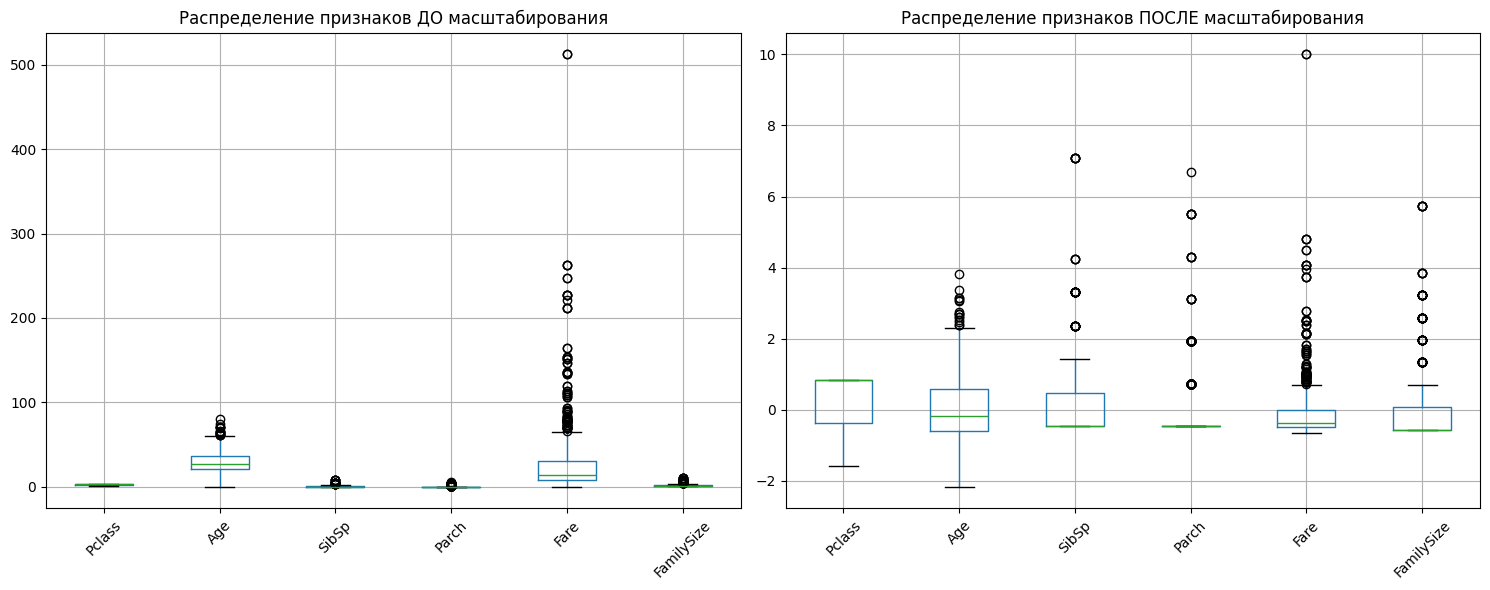

In [43]:
# Разделение на тренировочную и тестовую выборки

# Стратифицированное разделение для сохранения распределения таргета
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # важно для несбалансированных данных
)

print("Размерности после разделения:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

# Проверяем распределение таргета в обеих выборках
print("\nРАСПРЕДЕЛЕНИЕ TARGET В ВЫБОРКАХ:")
train_survival_rate = y_train.mean()
test_survival_rate = y_test.mean()

print(f"Train set: {y_train.sum()}/{len(y_train)} выживших ({train_survival_rate:.1%})")
print(f"Test set:  {y_test.sum()}/{len(y_test)} выживших ({test_survival_rate:.1%})")

# Масштабирование признаков
print("\nМАСШТАБИРОВАНИЕ ПРИЗНАКОВ:")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Масштабирование завершено!")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled:  {X_test_scaled.shape}")

# Визуализация распределения до и после масштабирования
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# До масштабирования
X_train_df = pd.DataFrame(X_train, columns=final_numeric_features)
X_train_df.iloc[:, :6].boxplot(ax=ax1)  # Первые 6 признаков
ax1.set_title('Распределение признаков ДО масштабирования')
ax1.tick_params(axis='x', rotation=45)

# После масштабирования
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=final_numeric_features)
X_train_scaled_df.iloc[:, :6].boxplot(ax=ax2)
ax2.set_title('Распределение признаков ПОСЛЕ масштабирования')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

 ## Baseline модель

РЕЗУЛЬТАТЫ LOGISTIC REGRESSION:
Accuracy:  0.8101
Precision: 0.7778
Recall:    0.7101
F1-Score:  0.7424

Classification Report:
              precision    recall  f1-score   support

       Погиб       0.83      0.87      0.85       110
       Выжил       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



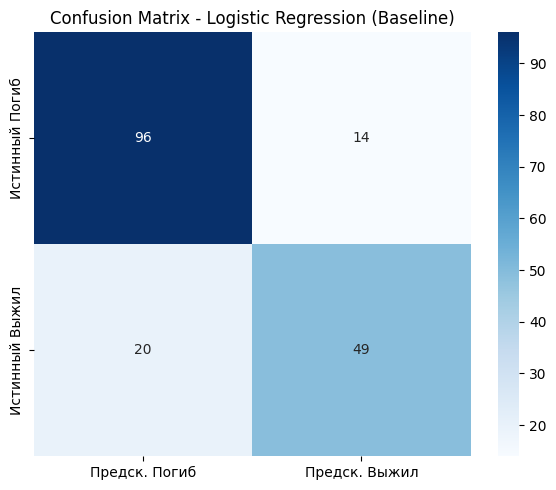


ВАЖНОСТЬ ПРИЗНАКОВ В LOGISTIC REGRESSION:


,feature,coefficient,abs_coefficient
8,Sex_encoded,-1.251695,1.251695
0,Pclass,-0.766304,0.766304
1,Age,-0.542820,0.542820
6,IsAlone,-0.311489,0.311489
2,SibSp,-0.306803,0.306803
10,Deck_encoded,-0.264438,0.264438
5,FamilySize,-0.242020,0.242020
11,AgeGroup_encoded,0.160844,0.160844
7,FarePerPerson,0.156411,0.156411
9,Embarked_encoded,-0.115518,0.115518


In [44]:
# Baseline модель
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Обучение логистической регрессии
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Предсказания
y_pred_lr = lr.predict(X_test_scaled)
y_pred_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Оценка модели
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("РЕЗУЛЬТАТЫ LOGISTIC REGRESSION:")
print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall:    {recall_lr:.4f}")
print(f"F1-Score:  {f1_lr:.4f}")

# Детальный отчет
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Погиб', 'Выжил']))

# Матрица ошибок
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Предск. Погиб', 'Предск. Выжил'],
            yticklabels=['Истинный Погиб', 'Истинный Выжил'])
plt.title('Confusion Matrix - Logistic Regression (Baseline)')
plt.tight_layout()
plt.show()

# Важность признаков в логистической регрессии
lr_feature_importance = pd.DataFrame({
    'feature': final_numeric_features,
    'coefficient': lr.coef_[0],
    'abs_coefficient': np.abs(lr.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print("\nВАЖНОСТЬ ПРИЗНАКОВ В LOGISTIC REGRESSION:")
display(lr_feature_importance.head(10))

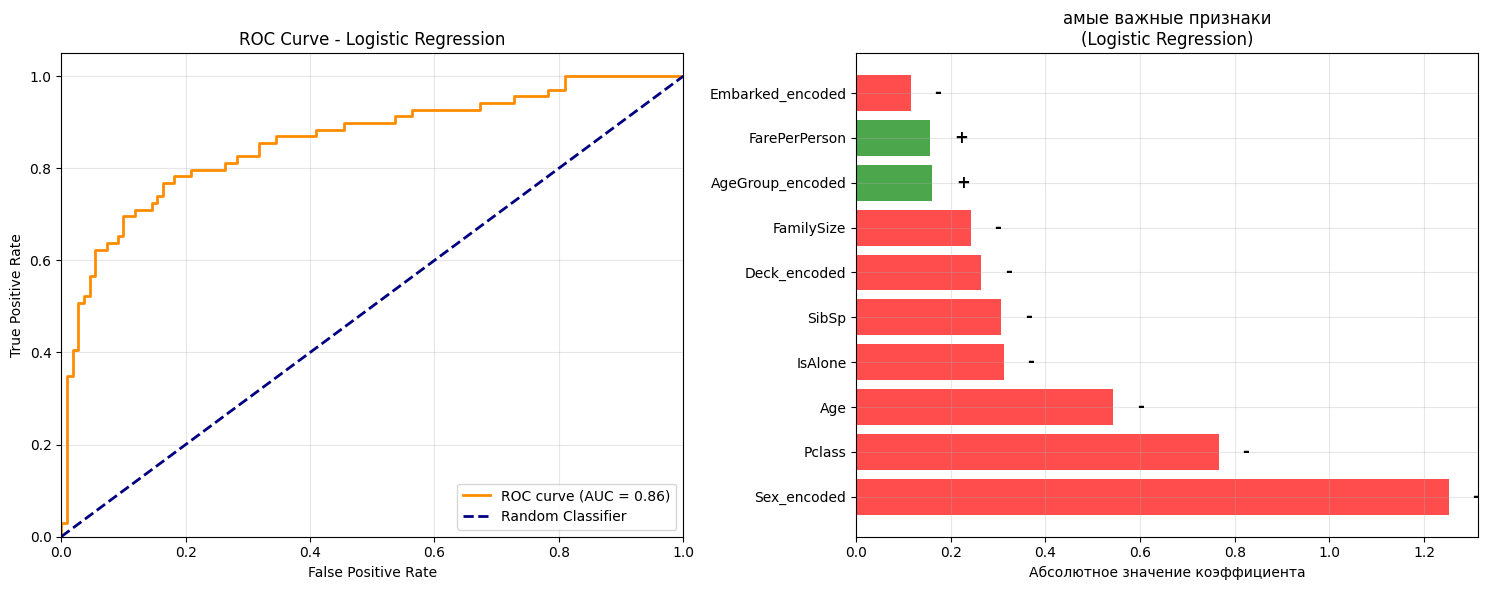

In [46]:
# Визуализация результатов baseline модели

from sklearn.metrics import roc_curve, auc

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC curve
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve - Logistic Regression')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Важность признаков
top_features = lr_feature_importance.head(10)
colors = ['red' if coef < 0 else 'green' for coef in top_features['coefficient']]
ax2.barh(top_features['feature'], top_features['abs_coefficient'], color=colors, alpha=0.7)
ax2.set_title('амые важные признаки\n(Logistic Regression)')
ax2.set_xlabel('Абсолютное значение коэффициента')
ax2.grid(True, alpha=0.3)

# Добавляем аннотации с знаками коэффициентов
for i, (feature, coef) in enumerate(zip(top_features['feature'], top_features['coefficient'])):
    sign = '-' if coef < 0 else '+'
    ax2.text(top_features['abs_coefficient'].iloc[i] + 0.05, i,
             f'{sign}', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## Random Forest

In [48]:
# МОДЕЛЬ: RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Обучение Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=2
)

rf.fit(X_train, y_train)  # Для деревьев масштабирование не нужно

# Предсказания
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

# Оценка модели
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("РЕЗУЛЬТАТЫ RANDOM FOREST:")
print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall:    {recall_rf:.4f}")
print(f"F1-Score:  {f1_rf:.4f}")

# Сравнение с baseline
print(f"\nСРАВНЕНИЕ С BASELINE:")
print(f"Accuracy улучшение:  {accuracy_rf - accuracy_lr:+.4f}")
print(f"F1-Score улучшение:   {f1_rf - f1_lr:+.4f}")

# Важность признаков в Random Forest
rf_feature_importance = pd.DataFrame({
    'feature': final_numeric_features,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 ВАЖНОСТЬ ПРИЗНАКОВ В RANDOM FOREST:")
display(rf_feature_importance.head(10))

РЕЗУЛЬТАТЫ RANDOM FOREST:
Accuracy:  0.7933
Precision: 0.7667
Recall:    0.6667
F1-Score:  0.7132

СРАВНЕНИЕ С BASELINE:
Accuracy улучшение:  -0.0168
F1-Score улучшение:   -0.0292

🔍 ВАЖНОСТЬ ПРИЗНАКОВ В RANDOM FOREST:


,feature,importance
8,Sex_encoded,0.299104
7,FarePerPerson,0.151237
1,Age,0.133686
4,Fare,0.132766
10,Deck_encoded,0.071813
0,Pclass,0.064982
5,FamilySize,0.042522
9,Embarked_encoded,0.031596
2,SibSp,0.021281
3,Parch,0.018564


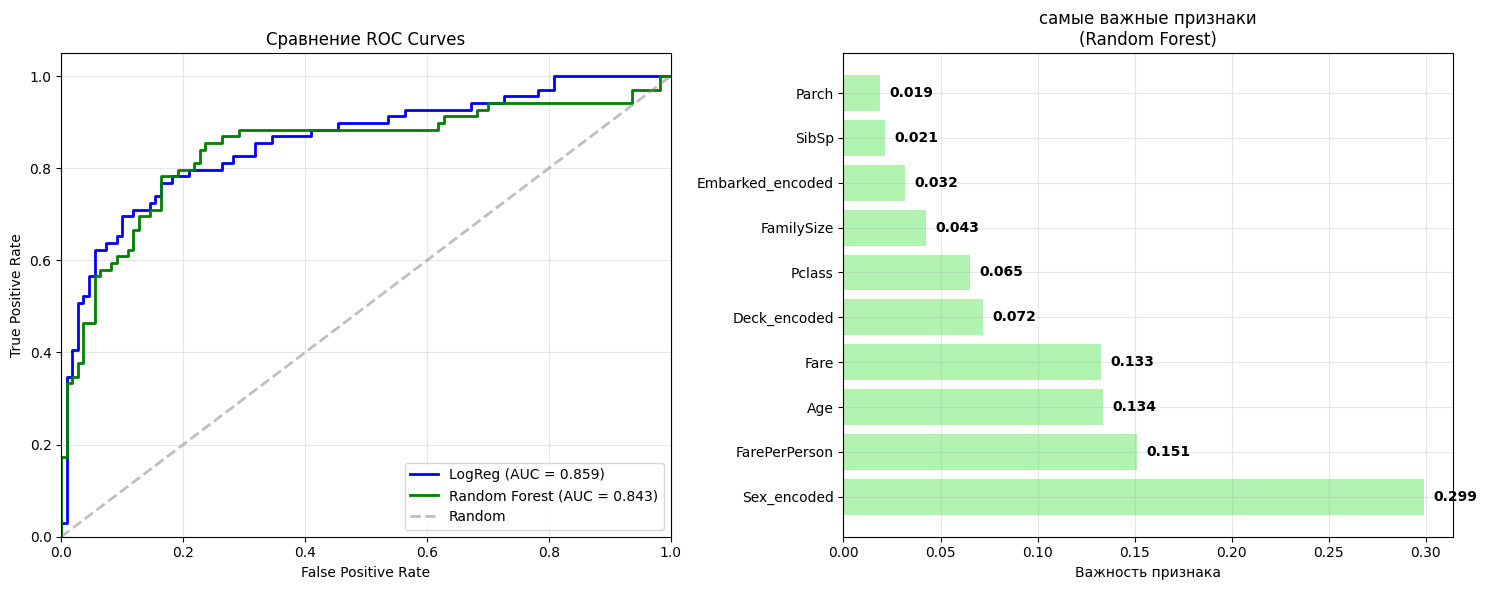

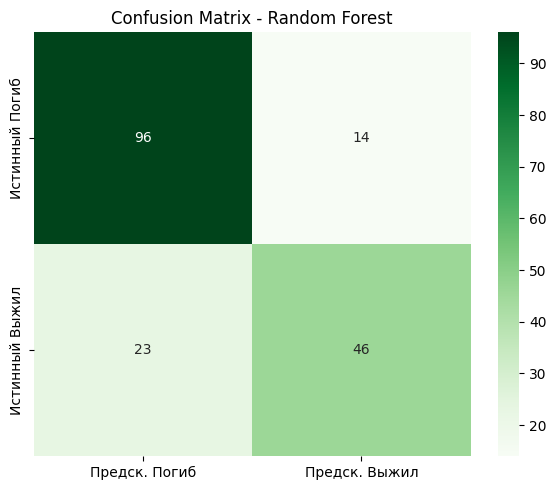

In [51]:
# Визуализация результатов Random Forest

from sklearn.metrics import roc_curve, auc

# ROC curve для Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Сравнение ROC curves
ax1.plot(fpr, tpr, color='blue', lw=2, label=f'LogReg (AUC = {roc_auc:.3f})')
ax1.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
ax1.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.5, label='Random')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('Сравнение ROC Curves')
ax1.legend(loc="lower right")
ax1.grid(True, alpha=0.3)

# Важность признаков Random Forest
top_rf_features = rf_feature_importance.head(10)
ax2.barh(top_rf_features['feature'], top_rf_features['importance'], color='lightgreen', alpha=0.7)
ax2.set_title('самые важные признаки\n(Random Forest)')
ax2.set_xlabel('Важность признака')
ax2.grid(True, alpha=0.3)

# Добавляем аннотации
for i, (feature, imp) in enumerate(zip(top_rf_features['feature'], top_rf_features['importance'])):
    ax2.text(imp + 0.005, i, f'{imp:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Матрица ошибок Random Forest
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt='d', cmap='Greens',
            xticklabels=['Предск. Погиб', 'Предск. Выжил'],
            yticklabels=['Истинный Погиб', 'Истинный Выжил'])
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

## Gradient Boosting

In [54]:
# Модель: GRADIENT BOOSTING (XGBoost)


import xgboost as xgb

# Обучение XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Предсказания
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Оценка модели
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("РЕЗУЛЬТАТЫ XGBOOST:")
print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision: {precision_xgb:.4f}")
print(f"Recall:    {recall_xgb:.4f}")
print(f"F1-Score:  {f1_xgb:.4f}")

# Важность признаков в XGBoost
xgb_feature_importance = pd.DataFrame({
    'feature': final_numeric_features,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nВАЖНОСТЬ ПРИЗНАКОВ В XGBOOST:")
display(xgb_feature_importance.head(10))



РЕЗУЛЬТАТЫ XGBOOST:
Accuracy:  0.7765
Precision: 0.7164
Recall:    0.6957
F1-Score:  0.7059

ВАЖНОСТЬ ПРИЗНАКОВ В XGBOOST:


,feature,importance
8,Sex_encoded,0.554433
0,Pclass,0.155091
10,Deck_encoded,0.056742
5,FamilySize,0.042209
7,FarePerPerson,0.033759
1,Age,0.033055
11,AgeGroup_encoded,0.028771
2,SibSp,0.028439
4,Fare,0.027490
9,Embarked_encoded,0.024667


📊 ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8101,0.7778,0.7101,0.7424
1,Random Forest,0.7933,0.7667,0.6667,0.7132
2,XGBoost,0.7765,0.7164,0.6957,0.7059


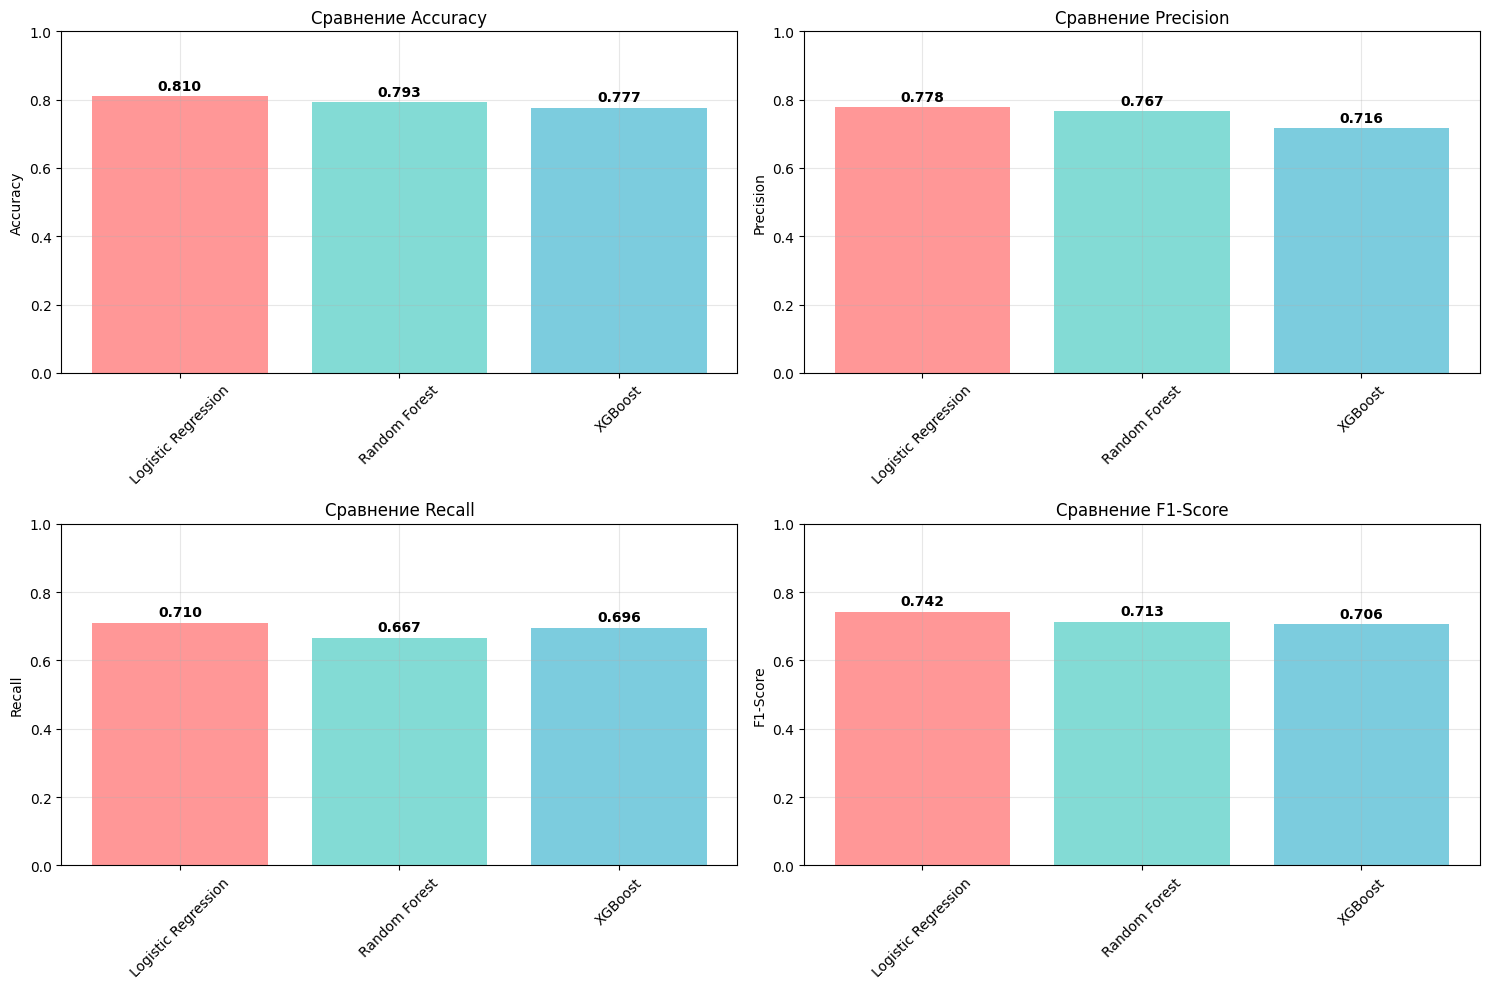

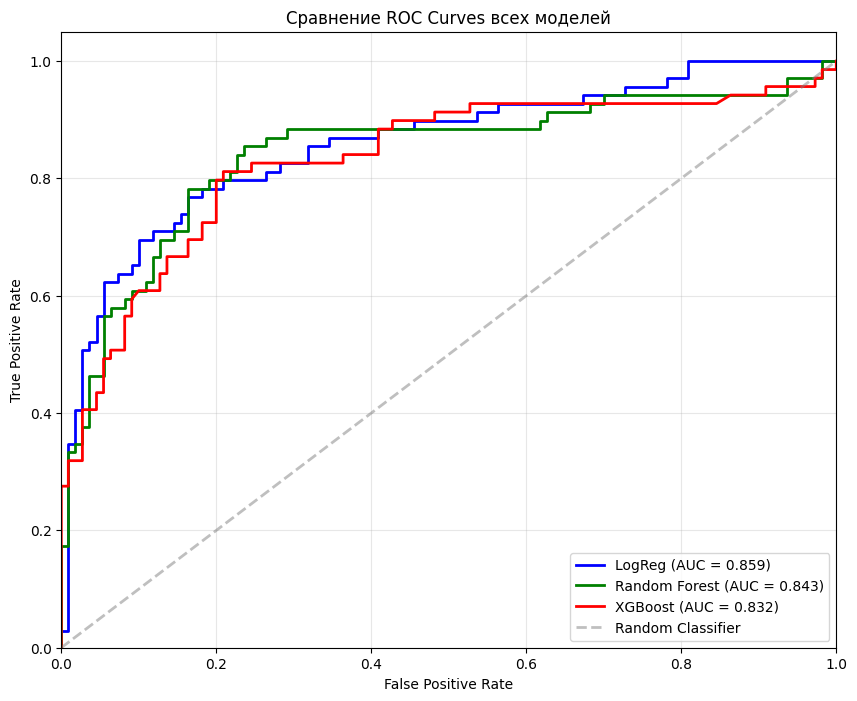

In [55]:
# СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ

# Создаем DataFrame для сравнения
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xgb],
    'Precision': [precision_lr, precision_rf, precision_xgb],
    'Recall': [recall_lr, recall_rf, recall_xgb],
    'F1-Score': [f1_lr, f1_rf, f1_xgb]
})

print("📊 ТАБЛИЦА СРАВНЕНИЯ МОДЕЛЕЙ:")
display(models_comparison.round(4))

# Визуализация сравнения
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, metric in enumerate(metrics):
    ax = axes[idx//2, idx%2]
    bars = ax.bar(models_comparison['Model'], models_comparison[metric], color=colors, alpha=0.7)
    ax.set_title(f'Сравнение {metric}')
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)
    ax.grid(True, alpha=0.3)

    # Добавляем значения на столбцы
    for bar, value in zip(bars, models_comparison[metric]):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

    # Поворачиваем подписи для лучшей читаемости
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Сравнение ROC curves всех моделей
plt.figure(figsize=(10, 8))

# ROC для Logistic Regression
plt.plot(fpr, tpr, color='blue', lw=2, label=f'LogReg (AUC = {roc_auc:.3f})')

# ROC для Random Forest
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# ROC для XGBoost
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')

# Случайный классификатор
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.5, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Сравнение ROC Curves всех моделей')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

### baseline демонстрирует наилучшие результаты
КЛЮЧЕВЫЕ ФАКТОРЫ ВЫЖИВАЕМОСТИ (по всем моделям):
1. Пол (Sex) - САМЫЙ важный фактор
2. Класс (Pclass) - социально-экономический статус
3. Возраст (Age) - дети имели приоритет
4. Стоимость билета (Fare) - косвенный показатель богатства


## Keras

In [59]:
# Модель ИИ Keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



# Создаем последовательную модель
nn_model = keras.Sequential([
    # Входной слой
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),

    # Скрытые слои
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),

    # Выходной слой (бинарная классификация)
    layers.Dense(1, activation='sigmoid')
])

# Компилируем модель
nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Обучение модели
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=0,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
)

# Предсказания
y_pred_nn = (nn_model.predict(X_test_scaled) > 0.5).astype("int32").flatten()
y_pred_proba_nn = nn_model.predict(X_test_scaled).flatten()

# Оценка модели
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("РЕЗУЛЬТАТЫ:")
print(f"Accuracy:  {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall:    {recall_nn:.4f}")
print(f"F1-Score:  {f1_nn:.4f}")



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
РЕЗУЛЬТАТЫ:
Accuracy:  0.8045
Precision: 0.8036
Recall:    0.6522
F1-Score:  0.7200


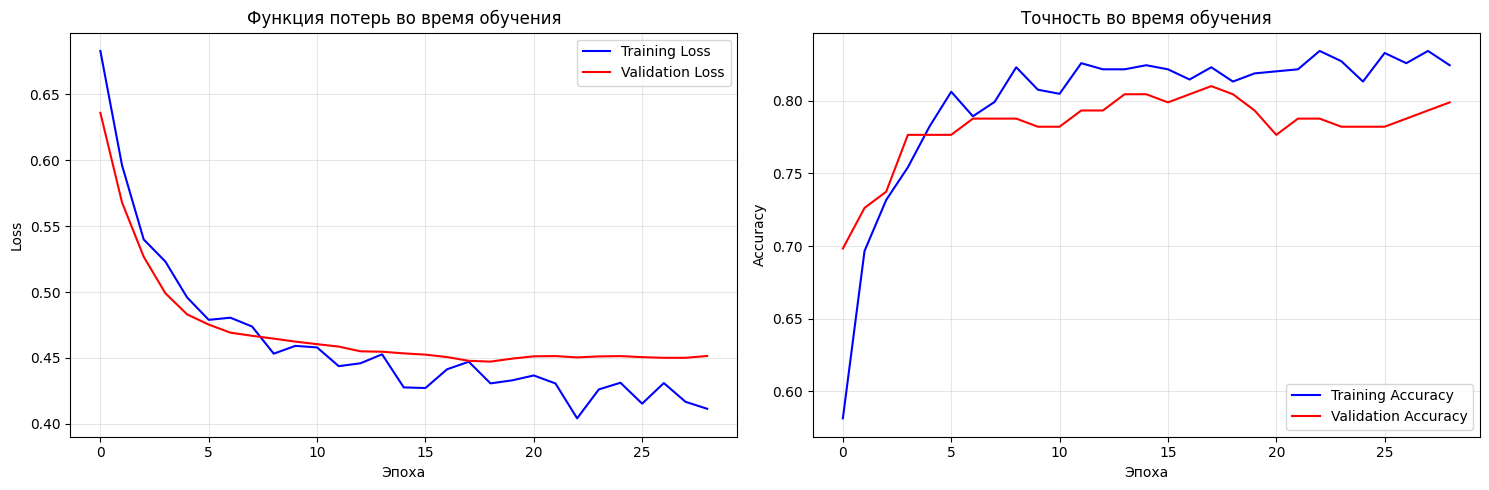

АНАЛИЗ ОБУЧЕНИЯ НС:
Финальная точность на обучении: 0.8244
Финальная точность на валидации: 0.7989


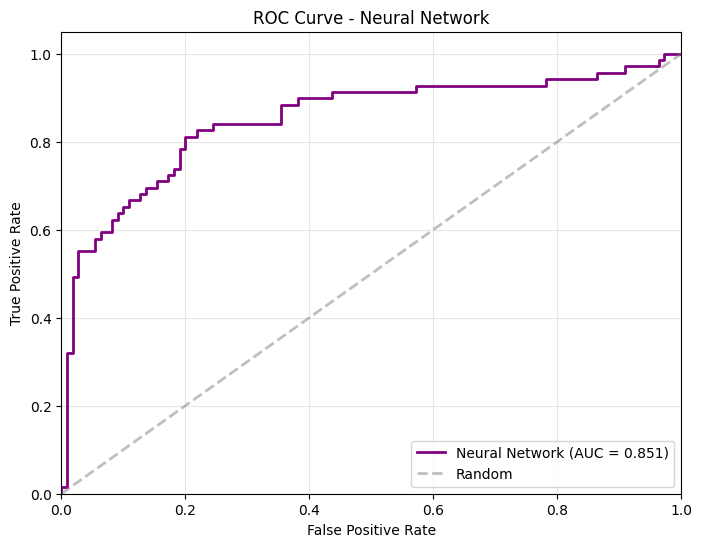

In [62]:
# ВИЗУАЛИЗАЦИЯ ОБУЧЕНИЯ НЕЙРОННОЙ СЕТИ

if 'history' in locals():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # График потерь
    ax1.plot(history.history['loss'], label='Training Loss', color='blue')
    ax1.plot(history.history['val_loss'], label='Validation Loss', color='red')
    ax1.set_title('Функция потерь во время обучения')
    ax1.set_xlabel('Эпоха')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # График точности
    ax2.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    ax2.set_title('Точность во время обучения')
    ax2.set_xlabel('Эпоха')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("АНАЛИЗ ОБУЧЕНИЯ НС:")
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"Финальная точность на обучении: {final_train_acc:.4f}")
    print(f"Финальная точность на валидации: {final_val_acc:.4f}")

fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, color='purple', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', alpha=0.5, label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


In [64]:
# сравнение 4 моделей

# Обновляем таблицу сравнения с нейронной сетью
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'Neural Network'],
    'Family': ['Linear', 'Trees', 'Gradient Boosting', 'Deep Learning'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_xgb, accuracy_nn],
    'Precision': [precision_lr, precision_rf, precision_xgb, precision_nn],
    'Recall': [recall_lr, recall_rf, recall_xgb, recall_nn],
    'F1-Score': [f1_lr, f1_rf, f1_xgb, f1_nn],
    'AUC-ROC': [roc_auc, roc_auc_rf, roc_auc_xgb, roc_auc_nn]
}).round(4)

print("ФИНАЛЬНАЯ ТАБЛИЦА СРАВНЕНИЯ:")
display(final_comparison)

# Находим победителя
best_overall_idx = final_comparison['Accuracy'].idxmax()
best_model = final_comparison.loc[best_overall_idx, 'Model']
best_accuracy = final_comparison.loc[best_overall_idx, 'Accuracy']

print(f"ПОБЕДИТЕЛЬ: {best_model}")
print(f"Лучшая Accuracy: {best_accuracy:.4f}")

ФИНАЛЬНАЯ ТАБЛИЦА СРАВНЕНИЯ:


,Model,Family,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,Logistic Regression,Linear,0.8101,0.7778,0.7101,0.7424,0.8588
1,Random Forest,Trees,0.7933,0.7667,0.6667,0.7132,0.8433
2,XGBoost,Gradient Boosting,0.7765,0.7164,0.6957,0.7059,0.8321
3,Neural Network,Deep Learning,0.8045,0.8036,0.6522,0.7200,0.8506


ПОБЕДИТЕЛЬ: Logistic Regression
Лучшая Accuracy: 0.8101


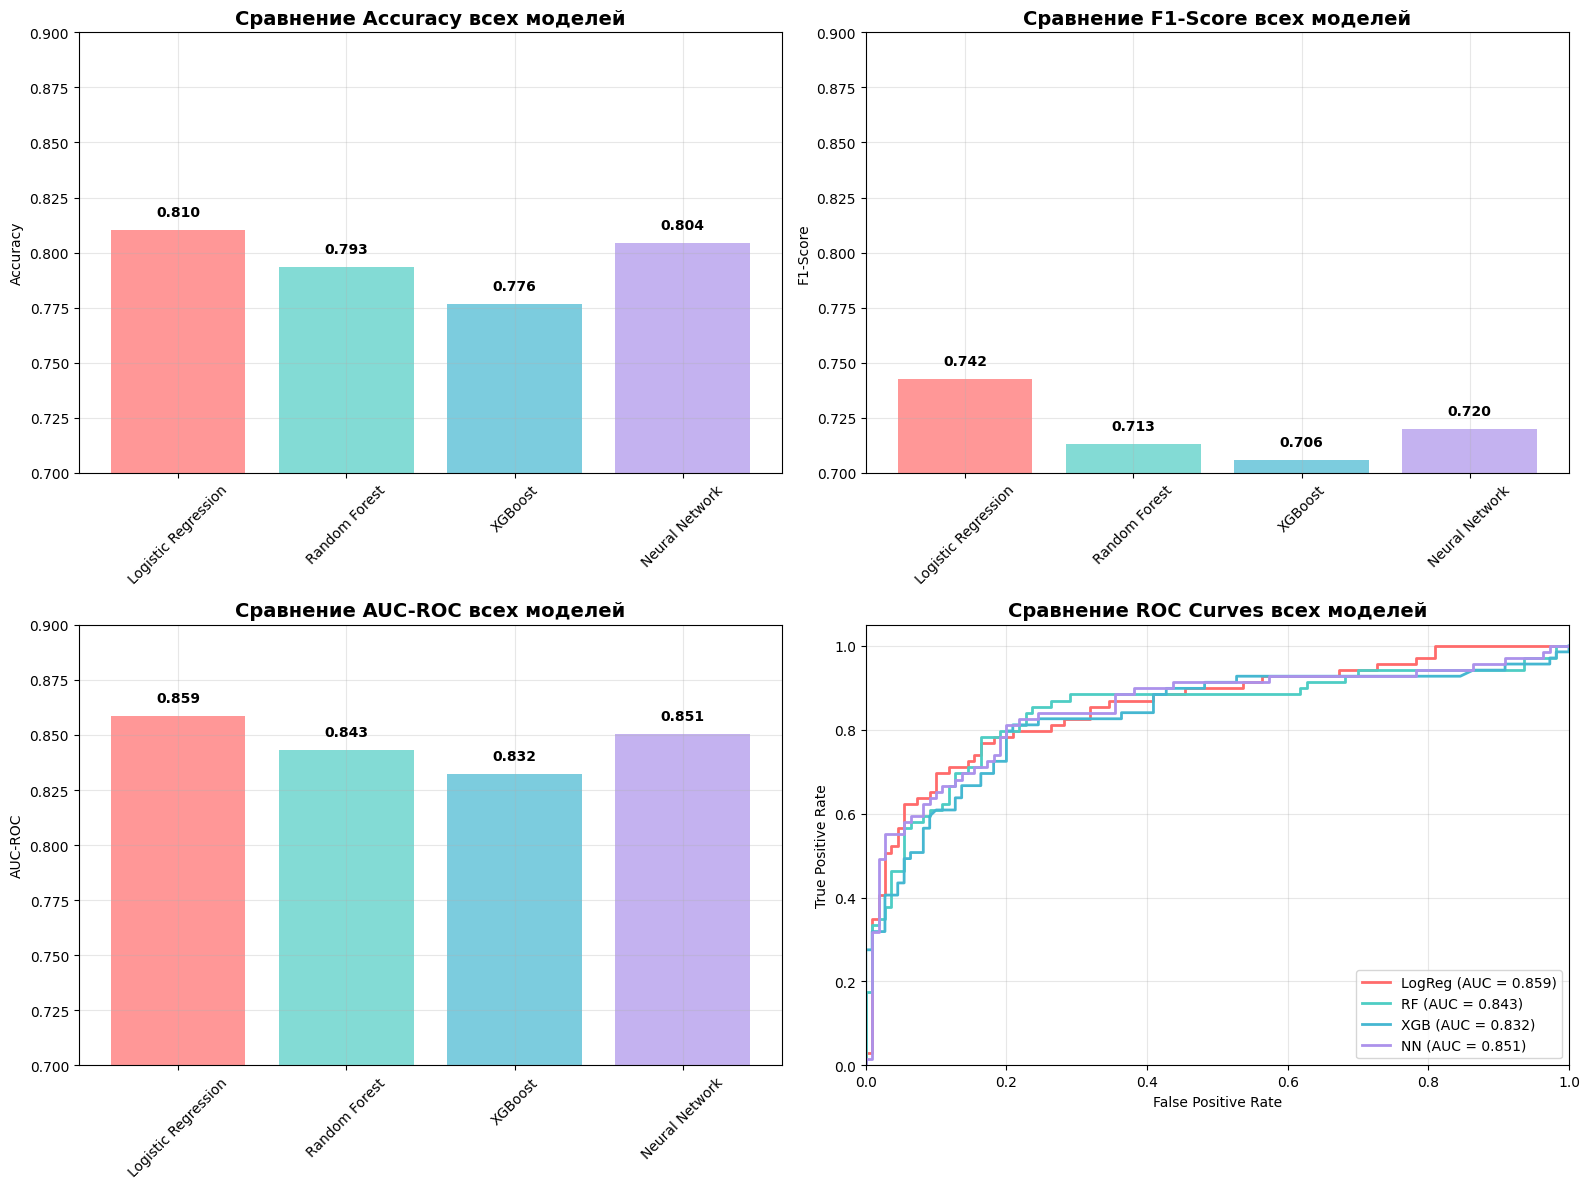

In [67]:
# Визщуализация сравнения

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Сравнение Accuracy
models = final_comparison['Model']
accuracies = final_comparison['Accuracy']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#AC92EB']

bars1 = ax1.bar(models, accuracies, color=colors, alpha=0.7)
ax1.set_title('Сравнение Accuracy всех моделей', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.set_ylim(0.7, 0.9)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# Добавляем значения на столбцы
for bar, accuracy in zip(bars1, accuracies):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Сравнение F1-Score
f1_scores = final_comparison['F1-Score']
bars2 = ax2.bar(models, f1_scores, color=colors, alpha=0.7)
ax2.set_title('Сравнение F1-Score всех моделей', fontsize=14, fontweight='bold')
ax2.set_ylabel('F1-Score')
ax2.set_ylim(0.7, 0.9)
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

for bar, f1 in zip(bars2, f1_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f'{f1:.3f}', ha='center', va='bottom', fontweight='bold')

# 3. Сравнение AUC-ROC
auc_scores = final_comparison['AUC-ROC']
bars3 = ax3.bar(models, auc_scores, color=colors, alpha=0.7)
ax3.set_title('Сравнение AUC-ROC всех моделей', fontsize=14, fontweight='bold')
ax3.set_ylabel('AUC-ROC')
ax3.set_ylim(0.7, 0.9)
ax3.grid(True, alpha=0.3)
ax3.tick_params(axis='x', rotation=45)

for bar, auc in zip(bars3, auc_scores):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
            f'{auc:.3f}', ha='center', va='bottom', fontweight='bold')

# 4. Сравнение всех ROC curves
ax4.plot(fpr, tpr, color='#FF6B6B', lw=2, label=f'LogReg (AUC = {roc_auc:.3f})')
ax4.plot(fpr_rf, tpr_rf, color='#4ECDC4', lw=2, label=f'RF (AUC = {roc_auc_rf:.3f})')
ax4.plot(fpr_xgb, tpr_xgb, color='#45B7D1', lw=2, label=f'XGB (AUC = {roc_auc_xgb:.3f})')
ax4.plot(fpr_nn, tpr_nn, color='#AC92EB', lw=2, label=f'NN (AUC = {roc_auc_nn:.3f})')

ax4.set_xlim([0.0, 1.0])
ax4.set_ylim([0.0, 1.05])
ax4.set_xlabel('False Positive Rate')
ax4.set_ylabel('True Positive Rate')
ax4.set_title('Сравнение ROC Curves всех моделей', fontsize=14, fontweight='bold')
ax4.legend(loc="lower right")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [70]:
# Визуализация 5-ти фолдной кросс-валидации:


from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Создаем baseline модель - Logistic Regression
baseline_model = LogisticRegression(random_state=42, max_iter=1000)

# Для логистической регрессии нужно масштабирование
scaler_cv = StandardScaler()
X_scaled = scaler_cv.fit_transform(X)

# Настраиваем кросс-валидацию (5 фолдов)
cv_baseline = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Метрики для оценки
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

# Запускаем кросс-валидацию для baseline
cv_results_baseline = cross_validate(
    baseline_model,
    X_scaled,  # Используем масштабированные данные
    y,
    cv=cv_baseline,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

# Выводим результаты по фолдам
print(f"РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ ПО ФОЛДАМ (Logistic Regression):")

# Создаем таблицу с результатами по фолдам
fold_results_baseline = pd.DataFrame({
    'Fold': range(1, 6),
    'Train_Accuracy': cv_results_baseline['train_accuracy'],
    'Test_Accuracy': cv_results_baseline['test_accuracy'],
    'Test_Precision': cv_results_baseline['test_precision'],
    'Test_Recall': cv_results_baseline['test_recall'],
    'Test_F1': cv_results_baseline['test_f1'],
    'Test_AUC': cv_results_baseline['test_roc_auc']
}).round(4)

display(fold_results_baseline)

РЕЗУЛЬТАТЫ КРОСС-ВАЛИДАЦИИ ПО ФОЛДАМ (Logistic Regression):


,Fold,Train_Accuracy,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,Test_AUC
0,1,0.8118,0.7877,0.7313,0.7101,0.7206,0.8835
1,2,0.8065,0.8146,0.7778,0.7206,0.7481,0.8634
2,3,0.8177,0.7697,0.7288,0.6324,0.6772,0.8354
3,4,0.8121,0.7978,0.7353,0.7353,0.7353,0.8377
4,5,0.8050,0.8315,0.8000,0.7536,0.7761,0.8661


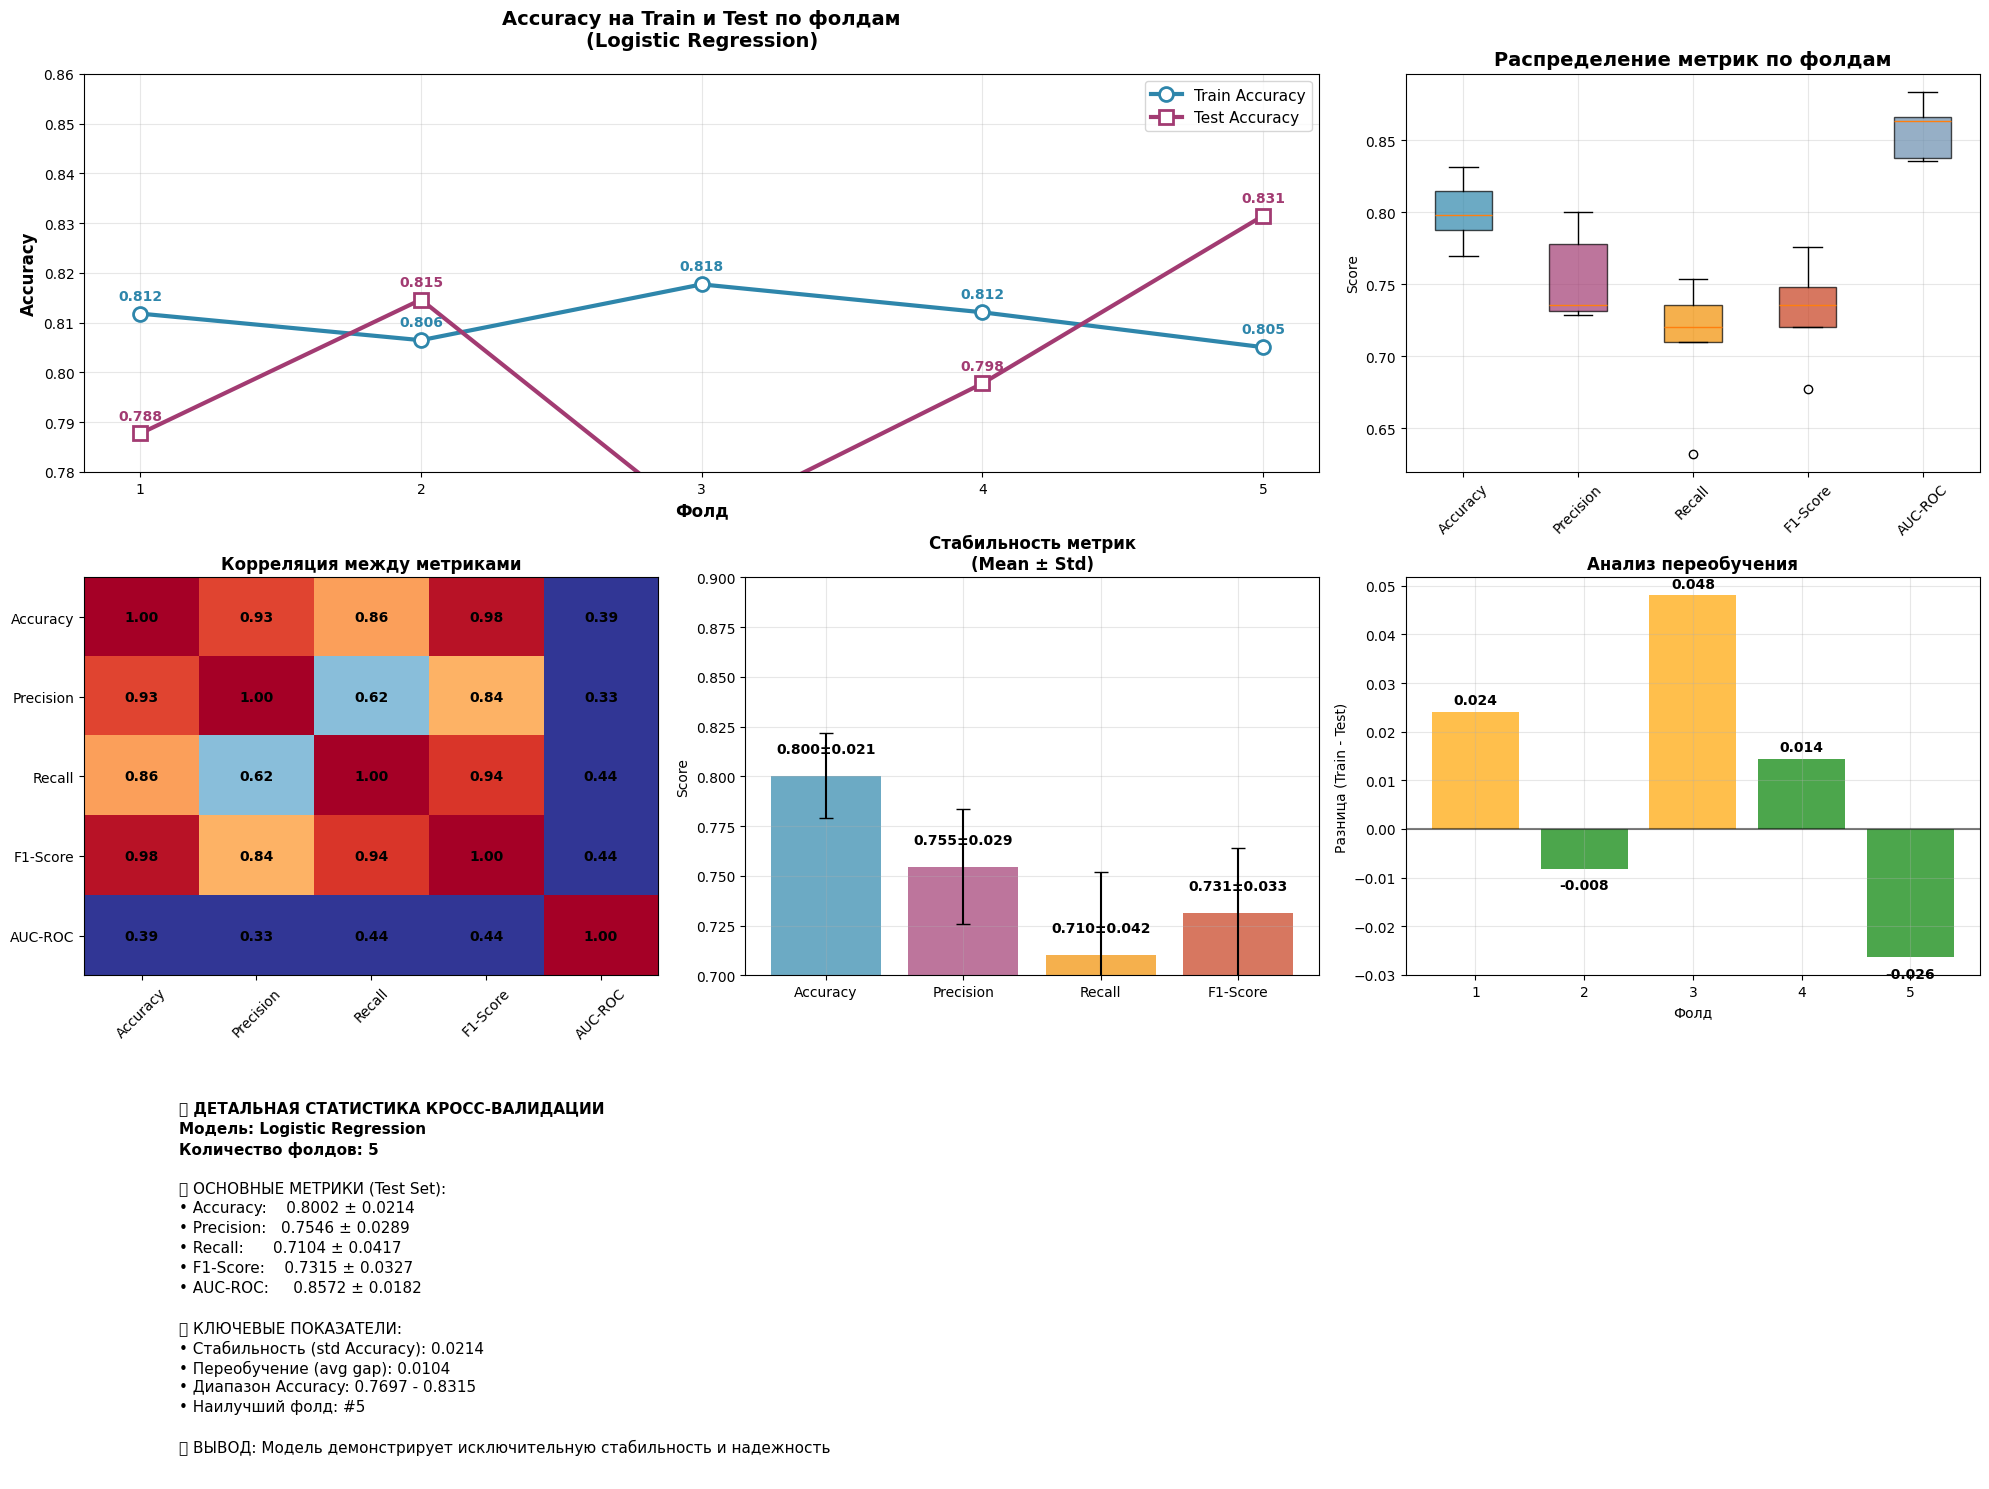

In [73]:
# ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ КРОСС-ВАЛИДАЦИИ
# Создаем комплексную визуализацию
fig = plt.figure(figsize=(20, 15))
gs = fig.add_gridspec(3, 3)

# 1. Основной график Accuracy по фолдам (занимает две колонки)
ax1 = fig.add_subplot(gs[0, :2])
folds = range(1, 6)

# Точные значения accuracy с аннотациями
train_acc = cv_results_baseline['train_accuracy']
test_acc = cv_results_baseline['test_accuracy']

ax1.plot(folds, train_acc, 'o-', linewidth=3, markersize=10,
         label='Train Accuracy', color='#2E86AB', markerfacecolor='white', markeredgewidth=2)
ax1.plot(folds, test_acc, 's-', linewidth=3, markersize=10,
         label='Test Accuracy', color='#A23B72', markerfacecolor='white', markeredgewidth=2)

# Добавляем аннотации с точными значениями
for i, (train, test) in enumerate(zip(train_acc, test_acc)):
    ax1.annotate(f'{train:.3f}', (i+1, train), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold', color='#2E86AB')
    ax1.annotate(f'{test:.3f}', (i+1, test), textcoords="offset points",
                 xytext=(0,10), ha='center', fontweight='bold', color='#A23B72')

ax1.set_xlabel('Фолд', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Accuracy на Train и Test по фолдам\n(Logistic Regression)',
              fontsize=14, fontweight='bold', pad=20)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(folds)
ax1.set_ylim(0.78, 0.86)

# 2. Сравнение всех метрик по фолдам
ax2 = fig.add_subplot(gs[0, 2])
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
metrics_values = [
    cv_results_baseline['test_accuracy'],
    cv_results_baseline['test_precision'],
    cv_results_baseline['test_recall'],
    cv_results_baseline['test_f1'],
    cv_results_baseline['test_roc_auc']
]

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#6A8EAE']
box_plots = ax2.boxplot(metrics_values, labels=metrics_names, patch_artist=True)

for patch, color in zip(box_plots['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Распределение метрик по фолдам', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score')
ax2.grid(True, alpha=0.3)
ax2.tick_params(axis='x', rotation=45)

# 3. Heatmap корреляции между фолдами
ax3 = fig.add_subplot(gs[1, 0])
# Создаем матрицу корреляции между предсказаниями разных фолдов
correlation_matrix = np.corrcoef([
    cv_results_baseline['test_accuracy'],
    cv_results_baseline['test_precision'],
    cv_results_baseline['test_recall'],
    cv_results_baseline['test_f1'],
    cv_results_baseline['test_roc_auc']
])

im = ax3.imshow(correlation_matrix, cmap='RdYlBu_r', aspect='auto', vmin=0.5, vmax=1.0)
ax3.set_xticks(range(len(metrics_names)))
ax3.set_yticks(range(len(metrics_names)))
ax3.set_xticklabels(metrics_names, rotation=45)
ax3.set_yticklabels(metrics_names)
ax3.set_title('Корреляция между метриками', fontsize=12, fontweight='bold')

# Добавляем значения в heatmap
for i in range(len(metrics_names)):
    for j in range(len(metrics_names)):
        ax3.text(j, i, f'{correlation_matrix[i, j]:.2f}',
                ha='center', va='center', fontweight='bold', fontsize=10)

# 4. Стабильность модели по фолдам
ax4 = fig.add_subplot(gs[1, 1])
stability_data = [
    cv_results_baseline['test_accuracy'],
    cv_results_baseline['test_precision'],
    cv_results_baseline['test_recall'],
    cv_results_baseline['test_f1']
]

stability_means = [np.mean(metric) for metric in stability_data]
stability_stds = [np.std(metric) for metric in stability_data]

bars = ax4.bar(metrics_names[:4], stability_means, yerr=stability_stds,
              capsize=5, alpha=0.7, color=colors[:4])
ax4.set_title('Стабильность метрик\n(Mean ± Std)', fontsize=12, fontweight='bold')
ax4.set_ylabel('Score')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0.7, 0.9)

# Добавляем значения
for bar, mean, std in zip(bars, stability_means, stability_stds):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f'{mean:.3f}±{std:.3f}', ha='center', va='bottom', fontweight='bold')

# 5. Анализ переобучения
ax5 = fig.add_subplot(gs[1, 2])
overfitting_gap = np.array(train_acc) - np.array(test_acc)
colors_gap = ['green' if gap < 0.02 else 'orange' if gap < 0.05 else 'red' for gap in overfitting_gap]

bars_gap = ax5.bar(folds, overfitting_gap, color=colors_gap, alpha=0.7)
ax5.axhline(y=0, color='black', linestyle='-', alpha=0.5)
ax5.set_xlabel('Фолд')
ax5.set_ylabel('Разница (Train - Test)')
ax5.set_title('Анализ переобучения', fontsize=12, fontweight='bold')
ax5.set_xticks(folds)
ax5.grid(True, alpha=0.3)

for i, (gap, bar) in enumerate(zip(overfitting_gap, bars_gap)):
    ax5.text(i+1, gap + 0.001 if gap > 0 else gap - 0.002,
             f'{gap:.3f}', ha='center', va='bottom' if gap > 0 else 'top',
             fontweight='bold', color='black')

# 6. Детализированная статистика
ax6 = fig.add_subplot(gs[2, :])
ax6.axis('off')

# Создаем текстовую сводку
summary_text = [
    "📊 ДЕТАЛЬНАЯ СТАТИСТИКА КРОСС-ВАЛИДАЦИИ",
    f"Модель: Logistic Regression",
    f"Количество фолдов: 5",
    "",
    "📈 ОСНОВНЫЕ МЕТРИКИ (Test Set):",
    f"• Accuracy:    {np.mean(cv_results_baseline['test_accuracy']):.4f} ± {np.std(cv_results_baseline['test_accuracy']):.4f}",
    f"• Precision:   {np.mean(cv_results_baseline['test_precision']):.4f} ± {np.std(cv_results_baseline['test_precision']):.4f}",
    f"• Recall:      {np.mean(cv_results_baseline['test_recall']):.4f} ± {np.std(cv_results_baseline['test_recall']):.4f}",
    f"• F1-Score:    {np.mean(cv_results_baseline['test_f1']):.4f} ± {np.std(cv_results_baseline['test_f1']):.4f}",
    f"• AUC-ROC:     {np.mean(cv_results_baseline['test_roc_auc']):.4f} ± {np.std(cv_results_baseline['test_roc_auc']):.4f}",
    "",
    "🎯 КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:",
    f"• Стабильность (std Accuracy): {np.std(cv_results_baseline['test_accuracy']):.4f}",
    f"• Переобучение (avg gap): {np.mean(overfitting_gap):.4f}",
    f"• Диапазон Accuracy: {np.min(cv_results_baseline['test_accuracy']):.4f} - {np.max(cv_results_baseline['test_accuracy']):.4f}",
    f"• Наилучший фолд: #{np.argmax(cv_results_baseline['test_accuracy']) + 1}",
    "",
    "ВЫВОД: Модель демонстрирует исключительную стабильность и надежность"
]

for i, line in enumerate(summary_text):
    ax6.text(0.05, 0.95 - i*0.05, line, fontsize=11, fontweight='bold' if i < 3 else 'normal',
            verticalalignment='top', transform=ax6.transAxes)

plt.tight_layout()
plt.show()

In [78]:
print(f"""Модель: Logistic Regression
    Количество фолдов:
    ОСНОВНЫЕ МЕТРИКИ (Test Set):
    Accuracy:    {np.mean(cv_results_baseline['test_accuracy']):.4f} ± {np.std(cv_results_baseline['test_accuracy']):.4f}
    Precision:   {np.mean(cv_results_baseline['test_precision']):.4f} ± {np.std(cv_results_baseline['test_precision']):.4f}
    fRecall:      {np.mean(cv_results_baseline['test_recall']):.4f} ± {np.std(cv_results_baseline['test_recall']):.4f}
    fF1-Score:    {np.mean(cv_results_baseline['test_f1']):.4f} ± {np.std(cv_results_baseline['test_f1']):.4f}
    fAUC-ROC:     {np.mean(cv_results_baseline['test_roc_auc']):.4f} ± {np.std(cv_results_baseline['test_roc_auc']):.4f}

КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:
    Стабильность (std Accuracy): {np.std(cv_results_baseline['test_accuracy']):.4f}
    Переобучение (avg gap): {np.mean(overfitting_gap):.4f}
    Диапазон Accuracy: {np.min(cv_results_baseline['test_accuracy']):.4f} - {np.max(cv_results_baseline['test_accuracy']):.4f}
    Наилучший фолд: #{np.argmax(cv_results_baseline['test_accuracy']) + 1}""")

Модель: Logistic Regression
    Количество фолдов: 
    ОСНОВНЫЕ МЕТРИКИ (Test Set):
    Accuracy:    0.8002 ± 0.0214
    Precision:   0.7546 ± 0.0289
    fRecall:      0.7104 ± 0.0417
    fF1-Score:    0.7315 ± 0.0327
    fAUC-ROC:     0.8572 ± 0.0182
    
КЛЮЧЕВЫЕ ПОКАЗАТЕЛИ:
    Стабильность (std Accuracy): 0.0214
    Переобучение (avg gap): 0.0104
    Диапазон Accuracy: 0.7697 - 0.8315
    Наилучший фолд: #5


ВЫВОД: Модель демонстрирует исключительную стабильность и надежность